In [1]:
import numpy as np
 
import os

In [2]:
#os.chdir("../input")
import pandas as pd
data = pd.read_csv("T351_aluminium_data_true.csv")
data[0:5]

,R,delta_K,crack_growth_rate
0,0.0,3.31514,5.040000e-07
1,0.0,3.36765,8.930000e-07
2,0.0,3.44451,1.010000e-06
3,0.0,3.52313,1.190000e-06
4,0.0,3.61371,1.730000e-06


In [3]:
original_data = pd.read_csv("T351_aluminium_data_true.csv")

In [4]:
data.shape

(77, 3)

In [5]:
data["crack_growth_rate"] = (10**(5) ) * data["crack_growth_rate"]

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 


Using TensorFlow backend.


In [7]:
from keras.models import model_from_json

In [8]:
x=data.drop(['crack_growth_rate'],axis=1)
y=data.drop(['R','delta_K'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)



In [9]:
X_train.shape[1]

2

In [10]:
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [12]:
NN_model.fit(X_train,y_train, epochs=10000, batch_size=32, validation_split = 0.15)

Instructions for updating:
Use tf.cast instead.
Train on 58 samples, validate on 11 samples
Epoch 1/10000
58/58 [==============================] - 454s 8s/step - loss: 4.4143 - mean_absolute_error: 4.4143 - val_loss: 2.1619 - val_mean_absolute_error: 2.1619
Epoch 2/10000
58/58 [==============================] - 0s 172us/step - loss: 4.2455 - mean_absolute_error: 4.2455 - val_loss: 1.9595 - val_mean_absolute_error: 1.9595
Epoch 3/10000
58/58 [==============================] - 0s 539us/step - loss: 4.2050 - mean_absolute_error: 4.2050 - val_loss: 1.9328 - val_mean_absolute_error: 1.9328
Epoch 4/10000
58/58 [==============================] - 0s 269us/step - loss: 4.1924 - mean_absolute_error: 4.1924 - val_loss: 1.9316 - val_mean_absolute_error: 1.9316
Epoch 5/10000
58/58 [==============================] - 0s 269us/step - loss: 4.1864 - mean_absolute_error: 4.1864 - val_loss: 1.9335 - val_mean_absolute_error: 1.9335
Epoch 6/10000
58/58 [==============================] - 0s 269us/step - los

Epoch 48/10000
58/58 [==============================] - 0s 651us/step - loss: 1.5733 - mean_absolute_error: 1.5733 - val_loss: 1.1185 - val_mean_absolute_error: 1.1185
Epoch 49/10000
58/58 [==============================] - 0s 1ms/step - loss: 1.5634 - mean_absolute_error: 1.5634 - val_loss: 1.1540 - val_mean_absolute_error: 1.1540
Epoch 50/10000
58/58 [==============================] - 0s 269us/step - loss: 1.6037 - mean_absolute_error: 1.6037 - val_loss: 1.4744 - val_mean_absolute_error: 1.4744
Epoch 51/10000
58/58 [==============================] - 0s 495us/step - loss: 1.6310 - mean_absolute_error: 1.6310 - val_loss: 1.9339 - val_mean_absolute_error: 1.9339
Epoch 52/10000
58/58 [==============================] - 0s 521us/step - loss: 1.6240 - mean_absolute_error: 1.6240 - val_loss: 1.2606 - val_mean_absolute_error: 1.2606
Epoch 53/10000
58/58 [==============================] - 0s 661us/step - loss: 1.4366 - mean_absolute_error: 1.4366 - val_loss: 1.2172 - val_mean_absolute_error: 1

Epoch 97/10000
58/58 [==============================] - 0s 694us/step - loss: 1.2244 - mean_absolute_error: 1.2244 - val_loss: 1.1395 - val_mean_absolute_error: 1.1395
Epoch 98/10000
58/58 [==============================] - 0s 695us/step - loss: 1.2600 - mean_absolute_error: 1.2600 - val_loss: 1.1470 - val_mean_absolute_error: 1.1470
Epoch 99/10000
58/58 [==============================] - 0s 312us/step - loss: 1.1895 - mean_absolute_error: 1.1895 - val_loss: 1.0526 - val_mean_absolute_error: 1.0526
Epoch 100/10000
58/58 [==============================] - 0s 382us/step - loss: 1.2135 - mean_absolute_error: 1.2135 - val_loss: 1.0682 - val_mean_absolute_error: 1.0682
Epoch 101/10000
58/58 [==============================] - 0s 521us/step - loss: 1.1537 - mean_absolute_error: 1.1537 - val_loss: 1.2463 - val_mean_absolute_error: 1.2463
Epoch 102/10000
58/58 [==============================] - 0s 486us/step - loss: 1.2063 - mean_absolute_error: 1.2063 - val_loss: 1.2225 - val_mean_absolute_err

58/58 [==============================] - 0s 695us/step - loss: 1.1172 - mean_absolute_error: 1.1172 - val_loss: 0.8897 - val_mean_absolute_error: 0.8897
Epoch 146/10000
58/58 [==============================] - 0s 522us/step - loss: 0.9307 - mean_absolute_error: 0.9307 - val_loss: 0.7720 - val_mean_absolute_error: 0.7720
Epoch 147/10000
58/58 [==============================] - 0s 347us/step - loss: 1.0269 - mean_absolute_error: 1.0269 - val_loss: 0.6908 - val_mean_absolute_error: 0.6908
Epoch 148/10000
58/58 [==============================] - 0s 348us/step - loss: 0.9510 - mean_absolute_error: 0.9510 - val_loss: 0.7663 - val_mean_absolute_error: 0.7663
Epoch 149/10000
58/58 [==============================] - 0s 347us/step - loss: 1.0312 - mean_absolute_error: 1.0312 - val_loss: 0.6430 - val_mean_absolute_error: 0.6430
Epoch 150/10000
58/58 [==============================] - 0s 312us/step - loss: 0.9479 - mean_absolute_error: 0.9479 - val_loss: 0.6311 - val_mean_absolute_error: 0.6311
Ep

58/58 [==============================] - 0s 694us/step - loss: 1.1107 - mean_absolute_error: 1.1107 - val_loss: 0.7557 - val_mean_absolute_error: 0.7557
Epoch 194/10000
58/58 [==============================] - 0s 521us/step - loss: 0.9544 - mean_absolute_error: 0.9544 - val_loss: 0.4420 - val_mean_absolute_error: 0.4420
Epoch 195/10000
58/58 [==============================] - 0s 347us/step - loss: 0.9793 - mean_absolute_error: 0.9793 - val_loss: 0.4500 - val_mean_absolute_error: 0.4500
Epoch 196/10000
58/58 [==============================] - 0s 349us/step - loss: 0.9030 - mean_absolute_error: 0.9030 - val_loss: 0.8129 - val_mean_absolute_error: 0.8129
Epoch 197/10000
58/58 [==============================] - 0s 485us/step - loss: 1.1692 - mean_absolute_error: 1.1692 - val_loss: 0.7738 - val_mean_absolute_error: 0.7738
Epoch 198/10000
58/58 [==============================] - 0s 521us/step - loss: 1.0232 - mean_absolute_error: 1.0232 - val_loss: 0.5066 - val_mean_absolute_error: 0.5066
Ep

58/58 [==============================] - 0s 520us/step - loss: 0.8666 - mean_absolute_error: 0.8666 - val_loss: 0.5633 - val_mean_absolute_error: 0.5633
Epoch 242/10000
58/58 [==============================] - 0s 208us/step - loss: 0.8709 - mean_absolute_error: 0.8709 - val_loss: 0.4309 - val_mean_absolute_error: 0.4309
Epoch 243/10000
58/58 [==============================] - 0s 312us/step - loss: 0.7314 - mean_absolute_error: 0.7314 - val_loss: 0.3408 - val_mean_absolute_error: 0.3408
Epoch 244/10000
58/58 [==============================] - 0s 347us/step - loss: 0.7529 - mean_absolute_error: 0.7529 - val_loss: 0.3190 - val_mean_absolute_error: 0.3190
Epoch 245/10000
58/58 [==============================] - 0s 312us/step - loss: 0.7438 - mean_absolute_error: 0.7438 - val_loss: 0.2665 - val_mean_absolute_error: 0.2665
Epoch 246/10000
58/58 [==============================] - 0s 172us/step - loss: 0.7688 - mean_absolute_error: 0.7688 - val_loss: 0.5308 - val_mean_absolute_error: 0.5308
Ep

58/58 [==============================] - 0s 269us/step - loss: 0.7072 - mean_absolute_error: 0.7072 - val_loss: 0.6417 - val_mean_absolute_error: 0.6417
Epoch 290/10000
58/58 [==============================] - 0s 269us/step - loss: 0.9094 - mean_absolute_error: 0.9094 - val_loss: 0.3039 - val_mean_absolute_error: 0.3039
Epoch 291/10000
58/58 [==============================] - 0s 269us/step - loss: 0.7607 - mean_absolute_error: 0.7607 - val_loss: 0.3480 - val_mean_absolute_error: 0.3480
Epoch 292/10000
58/58 [==============================] - 0s 382us/step - loss: 0.6524 - mean_absolute_error: 0.6524 - val_loss: 0.3169 - val_mean_absolute_error: 0.3169
Epoch 293/10000
58/58 [==============================] - ETA: 0s - loss: 0.4578 - mean_absolute_error: 0.457 - 0s 269us/step - loss: 0.6518 - mean_absolute_error: 0.6518 - val_loss: 0.2793 - val_mean_absolute_error: 0.2793
Epoch 294/10000
58/58 [==============================] - 0s 539us/step - loss: 0.6869 - mean_absolute_error: 0.6869 -

Epoch 337/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.6369 - mean_absolute_error: 0.6369 - val_loss: 0.2896 - val_mean_absolute_error: 0.2896
Epoch 338/10000
58/58 [==============================] - 0s 347us/step - loss: 0.6349 - mean_absolute_error: 0.6349 - val_loss: 0.4688 - val_mean_absolute_error: 0.4688
Epoch 339/10000
58/58 [==============================] - 0s 520us/step - loss: 0.8918 - mean_absolute_error: 0.8918 - val_loss: 0.6986 - val_mean_absolute_error: 0.6986
Epoch 340/10000
58/58 [==============================] - 0s 867us/step - loss: 0.8991 - mean_absolute_error: 0.8991 - val_loss: 0.2629 - val_mean_absolute_error: 0.2629
Epoch 341/10000
58/58 [==============================] - 0s 347us/step - loss: 0.8170 - mean_absolute_error: 0.8170 - val_loss: 0.4797 - val_mean_absolute_error: 0.4797
Epoch 342/10000
58/58 [==============================] - 0s 347us/step - loss: 0.8350 - mean_absolute_error: 0.8350 - val_loss: 0.5685 - val_mean_absolute_er

Epoch 385/10000
58/58 [==============================] - 0s 311us/step - loss: 0.6364 - mean_absolute_error: 0.6364 - val_loss: 0.3426 - val_mean_absolute_error: 0.3426
Epoch 386/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6560 - mean_absolute_error: 0.6560 - val_loss: 0.2155 - val_mean_absolute_error: 0.2155
Epoch 387/10000
58/58 [==============================] - 0s 539us/step - loss: 0.6526 - mean_absolute_error: 0.6526 - val_loss: 0.2245 - val_mean_absolute_error: 0.2245
Epoch 388/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5828 - mean_absolute_error: 0.5828 - val_loss: 0.3818 - val_mean_absolute_error: 0.3818
Epoch 389/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6895 - mean_absolute_error: 0.6895 - val_loss: 0.2078 - val_mean_absolute_error: 0.2078
Epoch 390/10000
58/58 [==============================] - 0s 382us/step - loss: 0.6907 - mean_absolute_error: 0.6907 - val_loss: 0.2467 - val_mean_absolute_

58/58 [==============================] - 0s 269us/step - loss: 0.5901 - mean_absolute_error: 0.5901 - val_loss: 0.2003 - val_mean_absolute_error: 0.2003
Epoch 434/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5600 - mean_absolute_error: 0.5600 - val_loss: 0.5286 - val_mean_absolute_error: 0.5286
Epoch 435/10000
58/58 [==============================] - 0s 539us/step - loss: 0.8197 - mean_absolute_error: 0.8197 - val_loss: 0.3521 - val_mean_absolute_error: 0.3521
Epoch 436/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6144 - mean_absolute_error: 0.6144 - val_loss: 0.3664 - val_mean_absolute_error: 0.3664
Epoch 437/10000
58/58 [==============================] - 0s 269us/step - loss: 0.8662 - mean_absolute_error: 0.8662 - val_loss: 0.2672 - val_mean_absolute_error: 0.2672
Epoch 438/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5890 - mean_absolute_error: 0.5890 - val_loss: 0.4757 - val_mean_absolute_error: 0.4757
Ep

58/58 [==============================] - 0s 1ms/step - loss: 0.6331 - mean_absolute_error: 0.6331 - val_loss: 0.3202 - val_mean_absolute_error: 0.3202
Epoch 482/10000
58/58 [==============================] - 0s 521us/step - loss: 0.5554 - mean_absolute_error: 0.5554 - val_loss: 0.2073 - val_mean_absolute_error: 0.2073
Epoch 483/10000
58/58 [==============================] - 0s 906us/step - loss: 0.6892 - mean_absolute_error: 0.6892 - val_loss: 0.3539 - val_mean_absolute_error: 0.3539
Epoch 484/10000
58/58 [==============================] - 0s 520us/step - loss: 0.6453 - mean_absolute_error: 0.6453 - val_loss: 0.3060 - val_mean_absolute_error: 0.3060
Epoch 485/10000
58/58 [==============================] - 0s 346us/step - loss: 0.7609 - mean_absolute_error: 0.7609 - val_loss: 0.2478 - val_mean_absolute_error: 0.2478
Epoch 486/10000
58/58 [==============================] - 0s 311us/step - loss: 0.6309 - mean_absolute_error: 0.6309 - val_loss: 0.5643 - val_mean_absolute_error: 0.5643
Epoc

58/58 [==============================] - 0s 0us/step - loss: 0.8381 - mean_absolute_error: 0.8381 - val_loss: 0.4314 - val_mean_absolute_error: 0.4314
Epoch 530/10000
58/58 [==============================] - 0s 270us/step - loss: 0.9670 - mean_absolute_error: 0.9670 - val_loss: 0.5123 - val_mean_absolute_error: 0.5123
Epoch 531/10000
58/58 [==============================] - 0s 269us/step - loss: 0.8485 - mean_absolute_error: 0.8485 - val_loss: 0.4708 - val_mean_absolute_error: 0.4708
Epoch 532/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6791 - mean_absolute_error: 0.6791 - val_loss: 0.3781 - val_mean_absolute_error: 0.3781
Epoch 533/10000
58/58 [==============================] - 0s 539us/step - loss: 0.7113 - mean_absolute_error: 0.7113 - val_loss: 0.4355 - val_mean_absolute_error: 0.4355
Epoch 534/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6784 - mean_absolute_error: 0.6784 - val_loss: 0.3500 - val_mean_absolute_error: 0.3500
Epoc

58/58 [==============================] - 0s 269us/step - loss: 0.5538 - mean_absolute_error: 0.5538 - val_loss: 0.2377 - val_mean_absolute_error: 0.2377
Epoch 578/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5511 - mean_absolute_error: 0.5511 - val_loss: 0.2534 - val_mean_absolute_error: 0.2534
Epoch 579/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5606 - mean_absolute_error: 0.5606 - val_loss: 0.2500 - val_mean_absolute_error: 0.2500
Epoch 580/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5592 - mean_absolute_error: 0.5592 - val_loss: 0.2117 - val_mean_absolute_error: 0.2117
Epoch 581/10000
58/58 [==============================] - 0s 382us/step - loss: 0.5674 - mean_absolute_error: 0.5674 - val_loss: 0.2829 - val_mean_absolute_error: 0.2829
Epoch 582/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5814 - mean_absolute_error: 0.5814 - val_loss: 0.2212 - val_mean_absolute_error: 0.2212
Ep

58/58 [==============================] - 0s 269us/step - loss: 0.6054 - mean_absolute_error: 0.6054 - val_loss: 0.3424 - val_mean_absolute_error: 0.3424
Epoch 626/10000
58/58 [==============================] - 0s 539us/step - loss: 0.7075 - mean_absolute_error: 0.7075 - val_loss: 0.3575 - val_mean_absolute_error: 0.3575
Epoch 627/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6633 - mean_absolute_error: 0.6633 - val_loss: 0.2896 - val_mean_absolute_error: 0.2896
Epoch 628/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5942 - mean_absolute_error: 0.5942 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727
Epoch 629/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6403 - mean_absolute_error: 0.6403 - val_loss: 0.3324 - val_mean_absolute_error: 0.3324
Epoch 630/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6339 - mean_absolute_error: 0.6339 - val_loss: 0.2228 - val_mean_absolute_error: 0.2228
Ep

58/58 [==============================] - 0s 382us/step - loss: 1.0769 - mean_absolute_error: 1.0769 - val_loss: 0.4521 - val_mean_absolute_error: 0.4521
Epoch 674/10000
58/58 [==============================] - 0s 269us/step - loss: 1.0399 - mean_absolute_error: 1.0399 - val_loss: 0.7892 - val_mean_absolute_error: 0.7892
Epoch 675/10000
58/58 [==============================] - 0s 269us/step - loss: 1.1691 - mean_absolute_error: 1.1691 - val_loss: 0.3719 - val_mean_absolute_error: 0.3719
Epoch 676/10000
58/58 [==============================] - 0s 539us/step - loss: 0.6592 - mean_absolute_error: 0.6592 - val_loss: 0.6810 - val_mean_absolute_error: 0.6810
Epoch 677/10000
58/58 [==============================] - 0s 269us/step - loss: 0.9919 - mean_absolute_error: 0.9919 - val_loss: 0.4193 - val_mean_absolute_error: 0.4193
Epoch 678/10000
58/58 [==============================] - 0s 270us/step - loss: 0.6897 - mean_absolute_error: 0.6897 - val_loss: 0.5103 - val_mean_absolute_error: 0.5103
Ep

58/58 [==============================] - 0s 348us/step - loss: 0.6432 - mean_absolute_error: 0.6432 - val_loss: 0.3033 - val_mean_absolute_error: 0.3033
Epoch 722/10000
58/58 [==============================] - 0s 348us/step - loss: 0.6737 - mean_absolute_error: 0.6737 - val_loss: 0.3558 - val_mean_absolute_error: 0.3558
Epoch 723/10000
58/58 [==============================] - 0s 312us/step - loss: 0.6196 - mean_absolute_error: 0.6196 - val_loss: 0.2807 - val_mean_absolute_error: 0.2807
Epoch 724/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5289 - mean_absolute_error: 0.5289 - val_loss: 0.3267 - val_mean_absolute_error: 0.3267
Epoch 725/10000
58/58 [==============================] - 0s 269us/step - loss: 0.8318 - mean_absolute_error: 0.8318 - val_loss: 0.2542 - val_mean_absolute_error: 0.2542
Epoch 726/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5322 - mean_absolute_error: 0.5322 - val_loss: 0.4065 - val_mean_absolute_error: 0.4065
Ep

58/58 [==============================] - 0s 557us/step - loss: 0.5443 - mean_absolute_error: 0.5443 - val_loss: 0.3499 - val_mean_absolute_error: 0.3499
Epoch 770/10000
58/58 [==============================] - 0s 659us/step - loss: 0.7024 - mean_absolute_error: 0.7024 - val_loss: 0.4225 - val_mean_absolute_error: 0.4225
Epoch 771/10000
58/58 [==============================] - 0s 312us/step - loss: 0.6740 - mean_absolute_error: 0.6740 - val_loss: 0.2896 - val_mean_absolute_error: 0.2896
Epoch 772/10000
58/58 [==============================] - 0s 521us/step - loss: 0.6980 - mean_absolute_error: 0.6980 - val_loss: 0.2885 - val_mean_absolute_error: 0.2885
Epoch 773/10000
58/58 [==============================] - 0s 555us/step - loss: 0.6840 - mean_absolute_error: 0.6840 - val_loss: 0.3950 - val_mean_absolute_error: 0.3950
Epoch 774/10000
58/58 [==============================] - 0s 347us/step - loss: 0.6601 - mean_absolute_error: 0.6601 - val_loss: 0.2818 - val_mean_absolute_error: 0.2818
Ep

58/58 [==============================] - 0s 347us/step - loss: 0.6150 - mean_absolute_error: 0.6150 - val_loss: 0.6630 - val_mean_absolute_error: 0.6630
Epoch 818/10000
58/58 [==============================] - 0s 695us/step - loss: 0.8444 - mean_absolute_error: 0.8444 - val_loss: 0.3374 - val_mean_absolute_error: 0.3374
Epoch 819/10000
58/58 [==============================] - 0s 555us/step - loss: 0.7793 - mean_absolute_error: 0.7793 - val_loss: 0.7071 - val_mean_absolute_error: 0.7071
Epoch 820/10000
58/58 [==============================] - 0s 661us/step - loss: 0.9203 - mean_absolute_error: 0.9203 - val_loss: 0.2826 - val_mean_absolute_error: 0.2826
Epoch 821/10000
58/58 [==============================] - 0s 869us/step - loss: 0.6361 - mean_absolute_error: 0.6361 - val_loss: 0.3970 - val_mean_absolute_error: 0.3970
Epoch 822/10000
58/58 [==============================] - 0s 348us/step - loss: 0.7226 - mean_absolute_error: 0.7226 - val_loss: 0.3861 - val_mean_absolute_error: 0.3861
Ep

58/58 [==============================] - 0s 348us/step - loss: 0.5572 - mean_absolute_error: 0.5572 - val_loss: 0.2340 - val_mean_absolute_error: 0.2340
Epoch 866/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5121 - mean_absolute_error: 0.5121 - val_loss: 0.2876 - val_mean_absolute_error: 0.2876
Epoch 867/10000
58/58 [==============================] - 0s 521us/step - loss: 0.5787 - mean_absolute_error: 0.5787 - val_loss: 0.2675 - val_mean_absolute_error: 0.2675
Epoch 868/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5093 - mean_absolute_error: 0.5093 - val_loss: 0.2248 - val_mean_absolute_error: 0.2248
Epoch 869/10000
58/58 [==============================] - 0s 382us/step - loss: 0.6007 - mean_absolute_error: 0.6007 - val_loss: 0.2244 - val_mean_absolute_error: 0.2244
Epoch 870/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5085 - mean_absolute_error: 0.5085 - val_loss: 0.2405 - val_mean_absolute_error: 0.2405
Ep

58/58 [==============================] - 0s 539us/step - loss: 0.6681 - mean_absolute_error: 0.6681 - val_loss: 0.3022 - val_mean_absolute_error: 0.3022
Epoch 914/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.5294 - mean_absolute_error: 0.5294 - val_loss: 0.3668 - val_mean_absolute_error: 0.3668
Epoch 915/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.6021 - mean_absolute_error: 0.6021 - val_loss: 0.3037 - val_mean_absolute_error: 0.3037
Epoch 916/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.6069 - mean_absolute_error: 0.6069 - val_loss: 0.3204 - val_mean_absolute_error: 0.3204
Epoch 917/10000
58/58 [==============================] - 0s 833us/step - loss: 0.6139 - mean_absolute_error: 0.6139 - val_loss: 0.3309 - val_mean_absolute_error: 0.3309
Epoch 918/10000
58/58 [==============================] - 0s 522us/step - loss: 0.6867 - mean_absolute_error: 0.6867 - val_loss: 0.4543 - val_mean_absolute_error: 0.4543
Epoch 91

58/58 [==============================] - 0s 660us/step - loss: 0.6209 - mean_absolute_error: 0.6209 - val_loss: 0.2721 - val_mean_absolute_error: 0.2721
Epoch 962/10000
58/58 [==============================] - 0s 696us/step - loss: 0.5699 - mean_absolute_error: 0.5699 - val_loss: 0.2192 - val_mean_absolute_error: 0.2192
Epoch 963/10000
58/58 [==============================] - 0s 522us/step - loss: 0.5542 - mean_absolute_error: 0.5542 - val_loss: 0.2636 - val_mean_absolute_error: 0.2636
Epoch 964/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.5838 - mean_absolute_error: 0.5838 - val_loss: 0.3586 - val_mean_absolute_error: 0.3586
Epoch 965/10000
58/58 [==============================] - 0s 660us/step - loss: 0.6399 - mean_absolute_error: 0.6399 - val_loss: 0.1968 - val_mean_absolute_error: 0.1968
Epoch 966/10000
58/58 [==============================] - 0s 313us/step - loss: 0.6310 - mean_absolute_error: 0.6310 - val_loss: 0.2168 - val_mean_absolute_error: 0.2168
Epoc

58/58 [==============================] - 0s 871us/step - loss: 0.5387 - mean_absolute_error: 0.5387 - val_loss: 0.4030 - val_mean_absolute_error: 0.4030
Epoch 1010/10000
58/58 [==============================] - 0s 869us/step - loss: 1.0364 - mean_absolute_error: 1.0364 - val_loss: 0.5176 - val_mean_absolute_error: 0.5176
Epoch 1011/10000
58/58 [==============================] - 0s 383us/step - loss: 0.9315 - mean_absolute_error: 0.9315 - val_loss: 0.5250 - val_mean_absolute_error: 0.5250
Epoch 1012/10000
58/58 [==============================] - 0s 697us/step - loss: 0.7522 - mean_absolute_error: 0.7522 - val_loss: 0.6085 - val_mean_absolute_error: 0.6085
Epoch 1013/10000
58/58 [==============================] - 0s 347us/step - loss: 0.7192 - mean_absolute_error: 0.7192 - val_loss: 0.4505 - val_mean_absolute_error: 0.4505
Epoch 1014/10000
58/58 [==============================] - 0s 382us/step - loss: 0.8012 - mean_absolute_error: 0.8012 - val_loss: 0.4424 - val_mean_absolute_error: 0.44

58/58 [==============================] - 0s 556us/step - loss: 0.5113 - mean_absolute_error: 0.5113 - val_loss: 0.5025 - val_mean_absolute_error: 0.5025
Epoch 1058/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.8221 - mean_absolute_error: 0.8221 - val_loss: 0.2796 - val_mean_absolute_error: 0.2796
Epoch 1059/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5448 - mean_absolute_error: 0.5448 - val_loss: 0.4239 - val_mean_absolute_error: 0.4239
Epoch 1060/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - val_loss: 0.2891 - val_mean_absolute_error: 0.2891
Epoch 1061/10000
58/58 [==============================] - 0s 521us/step - loss: 0.6110 - mean_absolute_error: 0.6110 - val_loss: 0.3697 - val_mean_absolute_error: 0.3697
Epoch 1062/10000
58/58 [==============================] - 0s 347us/step - loss: 0.6576 - mean_absolute_error: 0.6576 - val_loss: 0.2330 - val_mean_absolute_error: 0.2330
E

58/58 [==============================] - 0s 695us/step - loss: 0.5186 - mean_absolute_error: 0.5186 - val_loss: 0.5151 - val_mean_absolute_error: 0.5151
Epoch 1106/10000
58/58 [==============================] - 0s 695us/step - loss: 0.8437 - mean_absolute_error: 0.8437 - val_loss: 0.2481 - val_mean_absolute_error: 0.2481
Epoch 1107/10000
58/58 [==============================] - 0s 348us/step - loss: 0.4854 - mean_absolute_error: 0.4854 - val_loss: 0.4079 - val_mean_absolute_error: 0.4079
Epoch 1108/10000
58/58 [==============================] - 0s 172us/step - loss: 0.7384 - mean_absolute_error: 0.7384 - val_loss: 0.3064 - val_mean_absolute_error: 0.3064
Epoch 1109/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5219 - mean_absolute_error: 0.5219 - val_loss: 0.3377 - val_mean_absolute_error: 0.3377
Epoch 1110/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6311 - mean_absolute_error: 0.6311 - val_loss: 0.2880 - val_mean_absolute_error: 0.28

58/58 [==============================] - 0s 382us/step - loss: 0.6827 - mean_absolute_error: 0.6827 - val_loss: 0.2455 - val_mean_absolute_error: 0.2455
Epoch 1154/10000
58/58 [==============================] - 0s 270us/step - loss: 0.5357 - mean_absolute_error: 0.5357 - val_loss: 0.2446 - val_mean_absolute_error: 0.2446
Epoch 1155/10000
58/58 [==============================] - 0s 538us/step - loss: 0.5108 - mean_absolute_error: 0.5108 - val_loss: 0.2468 - val_mean_absolute_error: 0.2468
Epoch 1156/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5043 - mean_absolute_error: 0.5043 - val_loss: 0.2544 - val_mean_absolute_error: 0.2544
Epoch 1157/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5429 - mean_absolute_error: 0.5429 - val_loss: 0.3008 - val_mean_absolute_error: 0.3008
Epoch 1158/10000
58/58 [==============================] - 0s 112us/step - loss: 0.5966 - mean_absolute_error: 0.5966 - val_loss: 0.1980 - val_mean_absolute_error: 0.19

58/58 [==============================] - 0s 269us/step - loss: 0.5360 - mean_absolute_error: 0.5360 - val_loss: 0.2713 - val_mean_absolute_error: 0.2713
Epoch 1202/10000
58/58 [==============================] - 0s 382us/step - loss: 0.5492 - mean_absolute_error: 0.5492 - val_loss: 0.2589 - val_mean_absolute_error: 0.2589
Epoch 1203/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5171 - mean_absolute_error: 0.5171 - val_loss: 0.2113 - val_mean_absolute_error: 0.2113
Epoch 1204/10000
58/58 [==============================] - 0s 270us/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.1990 - val_mean_absolute_error: 0.1990
Epoch 1205/10000
58/58 [==============================] - 0s 538us/step - loss: 0.4700 - mean_absolute_error: 0.4700 - val_loss: 0.2361 - val_mean_absolute_error: 0.2361
Epoch 1206/10000
58/58 [==============================] - 0s 382us/step - loss: 0.4993 - mean_absolute_error: 0.4993 - val_loss: 0.2144 - val_mean_absolute_error: 0.21

58/58 [==============================] - 0s 269us/step - loss: 0.6715 - mean_absolute_error: 0.6715 - val_loss: 0.3106 - val_mean_absolute_error: 0.3106
Epoch 1250/10000
58/58 [==============================] - 0s 539us/step - loss: 0.6695 - mean_absolute_error: 0.6695 - val_loss: 0.1752 - val_mean_absolute_error: 0.1752
Epoch 1251/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5138 - mean_absolute_error: 0.5138 - val_loss: 0.2750 - val_mean_absolute_error: 0.2750
Epoch 1252/10000
58/58 [==============================] - 0s 382us/step - loss: 0.6808 - mean_absolute_error: 0.6808 - val_loss: 0.4849 - val_mean_absolute_error: 0.4849
Epoch 1253/10000
58/58 [==============================] - 0s 269us/step - loss: 0.7006 - mean_absolute_error: 0.7006 - val_loss: 0.4694 - val_mean_absolute_error: 0.4694
Epoch 1254/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6111 - mean_absolute_error: 0.6111 - val_loss: 0.2375 - val_mean_absolute_error: 0.23

58/58 [==============================] - 0s 539us/step - loss: 0.5383 - mean_absolute_error: 0.5383 - val_loss: 0.1877 - val_mean_absolute_error: 0.1877
Epoch 1298/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4932 - mean_absolute_error: 0.4932 - val_loss: 0.2544 - val_mean_absolute_error: 0.2544
Epoch 1299/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5515 - mean_absolute_error: 0.5515 - val_loss: 0.1865 - val_mean_absolute_error: 0.1865
Epoch 1300/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4452 - mean_absolute_error: 0.4452 - val_loss: 0.3208 - val_mean_absolute_error: 0.3208
Epoch 1301/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6451 - mean_absolute_error: 0.6451 - val_loss: 0.2032 - val_mean_absolute_error: 0.2032
Epoch 1302/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5499 - mean_absolute_error: 0.5499 - val_loss: 0.3294 - val_mean_absolute_error: 0.32

58/58 [==============================] - 0s 695us/step - loss: 0.8656 - mean_absolute_error: 0.8656 - val_loss: 0.2224 - val_mean_absolute_error: 0.2224
Epoch 1346/10000
58/58 [==============================] - 0s 870us/step - loss: 0.6858 - mean_absolute_error: 0.6858 - val_loss: 0.4651 - val_mean_absolute_error: 0.4651
Epoch 1347/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.8409 - mean_absolute_error: 0.8409 - val_loss: 0.3659 - val_mean_absolute_error: 0.3659
Epoch 1348/10000
58/58 [==============================] - 0s 348us/step - loss: 0.6005 - mean_absolute_error: 0.6005 - val_loss: 0.4315 - val_mean_absolute_error: 0.4315
Epoch 1349/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - val_loss: 0.2937 - val_mean_absolute_error: 0.2937
Epoch 1350/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5261 - mean_absolute_error: 0.5261 - val_loss: 0.3631 - val_mean_absolute_error: 0.3631
E

58/58 [==============================] - 0s 312us/step - loss: 0.4411 - mean_absolute_error: 0.4411 - val_loss: 0.2284 - val_mean_absolute_error: 0.2284
Epoch 1394/10000
58/58 [==============================] - 0s 521us/step - loss: 0.4538 - mean_absolute_error: 0.4538 - val_loss: 0.2084 - val_mean_absolute_error: 0.2084
Epoch 1395/10000
58/58 [==============================] - 0s 172us/step - loss: 0.4466 - mean_absolute_error: 0.4466 - val_loss: 0.2539 - val_mean_absolute_error: 0.2539
Epoch 1396/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5095 - mean_absolute_error: 0.5095 - val_loss: 0.2240 - val_mean_absolute_error: 0.2240
Epoch 1397/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4539 - mean_absolute_error: 0.4539 - val_loss: 0.1907 - val_mean_absolute_error: 0.1907
Epoch 1398/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5583 - mean_absolute_error: 0.5583 - val_loss: 0.1756 - val_mean_absolute_error: 0.17

58/58 [==============================] - 0s 695us/step - loss: 0.5494 - mean_absolute_error: 0.5494 - val_loss: 0.3244 - val_mean_absolute_error: 0.3244
Epoch 1442/10000
58/58 [==============================] - 0s 568us/step - loss: 0.4739 - mean_absolute_error: 0.4739 - val_loss: 0.1720 - val_mean_absolute_error: 0.1720
Epoch 1443/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.4578 - mean_absolute_error: 0.4578 - val_loss: 0.1727 - val_mean_absolute_error: 0.1727
Epoch 1444/10000
58/58 [==============================] - 0s 868us/step - loss: 0.5419 - mean_absolute_error: 0.5419 - val_loss: 0.1425 - val_mean_absolute_error: 0.1425
Epoch 1445/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.4398 - mean_absolute_error: 0.4398 - val_loss: 0.1698 - val_mean_absolute_error: 0.1698
Epoch 1446/10000
58/58 [==============================] - 0s 869us/step - loss: 0.5392 - mean_absolute_error: 0.5392 - val_loss: 0.2086 - val_mean_absolute_error: 0.2086
E

58/58 [==============================] - 0s 351us/step - loss: 0.5729 - mean_absolute_error: 0.5729 - val_loss: 0.2378 - val_mean_absolute_error: 0.2378
Epoch 1490/10000
58/58 [==============================] - 0s 172us/step - loss: 0.5616 - mean_absolute_error: 0.5616 - val_loss: 0.4925 - val_mean_absolute_error: 0.4925
Epoch 1491/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6035 - mean_absolute_error: 0.6035 - val_loss: 0.2437 - val_mean_absolute_error: 0.2437
Epoch 1492/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6410 - mean_absolute_error: 0.6410 - val_loss: 0.3473 - val_mean_absolute_error: 0.3473
Epoch 1493/10000
58/58 [==============================] - 0s 269us/step - loss: 0.6635 - mean_absolute_error: 0.6635 - val_loss: 0.2276 - val_mean_absolute_error: 0.2276
Epoch 1494/10000
58/58 [==============================] - 0s 539us/step - loss: 0.6369 - mean_absolute_error: 0.6369 - val_loss: 0.6347 - val_mean_absolute_error: 0.63

58/58 [==============================] - 0s 269us/step - loss: 0.4369 - mean_absolute_error: 0.4369 - val_loss: 0.2268 - val_mean_absolute_error: 0.2268
Epoch 1538/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5049 - mean_absolute_error: 0.5049 - val_loss: 0.2410 - val_mean_absolute_error: 0.2410
Epoch 1539/10000
58/58 [==============================] - 0s 382us/step - loss: 0.4366 - mean_absolute_error: 0.4366 - val_loss: 0.2079 - val_mean_absolute_error: 0.2079
Epoch 1540/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4275 - mean_absolute_error: 0.4275 - val_loss: 0.2283 - val_mean_absolute_error: 0.2283
Epoch 1541/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4600 - mean_absolute_error: 0.4600 - val_loss: 0.1750 - val_mean_absolute_error: 0.1750
Epoch 1542/10000
58/58 [==============================] - 0s 539us/step - loss: 0.4278 - mean_absolute_error: 0.4278 - val_loss: 0.1686 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 1ms/step - loss: 0.6648 - mean_absolute_error: 0.6648 - val_loss: 0.4631 - val_mean_absolute_error: 0.4631
Epoch 1586/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - val_loss: 0.3616 - val_mean_absolute_error: 0.3616
Epoch 1587/10000
58/58 [==============================] - 0s 833us/step - loss: 0.5502 - mean_absolute_error: 0.5502 - val_loss: 0.2358 - val_mean_absolute_error: 0.2358
Epoch 1588/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.5576 - mean_absolute_error: 0.5576 - val_loss: 0.4119 - val_mean_absolute_error: 0.4119
Epoch 1589/10000
58/58 [==============================] - 0s 868us/step - loss: 0.5822 - mean_absolute_error: 0.5822 - val_loss: 0.2564 - val_mean_absolute_error: 0.2564
Epoch 1590/10000
58/58 [==============================] - 0s 347us/step - loss: 0.6576 - mean_absolute_error: 0.6576 - val_loss: 0.3094 - val_mean_absolute_error: 0.3094
Epo

58/58 [==============================] - 0s 347us/step - loss: 0.5515 - mean_absolute_error: 0.5515 - val_loss: 0.1445 - val_mean_absolute_error: 0.1445
Epoch 1634/10000
58/58 [==============================] - 0s 316us/step - loss: 0.5896 - mean_absolute_error: 0.5896 - val_loss: 0.1776 - val_mean_absolute_error: 0.1776
Epoch 1635/10000
58/58 [==============================] - 0s 173us/step - loss: 0.4163 - mean_absolute_error: 0.4163 - val_loss: 0.2410 - val_mean_absolute_error: 0.2410
Epoch 1636/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5178 - mean_absolute_error: 0.5178 - val_loss: 0.2734 - val_mean_absolute_error: 0.2734
Epoch 1637/10000
58/58 [==============================] - 0s 539us/step - loss: 0.4878 - mean_absolute_error: 0.4878 - val_loss: 0.2294 - val_mean_absolute_error: 0.2294
Epoch 1638/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4827 - mean_absolute_error: 0.4827 - val_loss: 0.2426 - val_mean_absolute_error: 0.24

58/58 [==============================] - 0s 382us/step - loss: 0.5260 - mean_absolute_error: 0.5260 - val_loss: 0.2674 - val_mean_absolute_error: 0.2674
Epoch 1682/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5094 - mean_absolute_error: 0.5094 - val_loss: 0.2922 - val_mean_absolute_error: 0.2922
Epoch 1683/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5468 - mean_absolute_error: 0.5468 - val_loss: 0.2325 - val_mean_absolute_error: 0.2325
Epoch 1684/10000
58/58 [==============================] - 0s 539us/step - loss: 0.5583 - mean_absolute_error: 0.5583 - val_loss: 0.2625 - val_mean_absolute_error: 0.2625
Epoch 1685/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4914 - mean_absolute_error: 0.4914 - val_loss: 0.2193 - val_mean_absolute_error: 0.2193
Epoch 1686/10000
58/58 [==============================] - 0s 112us/step - loss: 0.4191 - mean_absolute_error: 0.4191 - val_loss: 0.2244 - val_mean_absolute_error: 0.22

58/58 [==============================] - 0s 733us/step - loss: 0.3890 - mean_absolute_error: 0.3890 - val_loss: 0.4488 - val_mean_absolute_error: 0.4488
Epoch 1730/10000
58/58 [==============================] - 0s 695us/step - loss: 0.5929 - mean_absolute_error: 0.5929 - val_loss: 0.1895 - val_mean_absolute_error: 0.1895
Epoch 1731/10000
58/58 [==============================] - 0s 868us/step - loss: 0.5243 - mean_absolute_error: 0.5243 - val_loss: 0.3233 - val_mean_absolute_error: 0.3233
Epoch 1732/10000
58/58 [==============================] - 0s 694us/step - loss: 0.6904 - mean_absolute_error: 0.6904 - val_loss: 0.2784 - val_mean_absolute_error: 0.2784
Epoch 1733/10000
58/58 [==============================] - 0s 522us/step - loss: 0.5641 - mean_absolute_error: 0.5641 - val_loss: 0.3686 - val_mean_absolute_error: 0.3686
Epoch 1734/10000
58/58 [==============================] - 0s 521us/step - loss: 0.6431 - mean_absolute_error: 0.6431 - val_loss: 0.3596 - val_mean_absolute_error: 0.35

58/58 [==============================] - 0s 694us/step - loss: 0.4971 - mean_absolute_error: 0.4971 - val_loss: 0.2759 - val_mean_absolute_error: 0.2759
Epoch 1778/10000
58/58 [==============================] - 0s 903us/step - loss: 0.6208 - mean_absolute_error: 0.6208 - val_loss: 0.2231 - val_mean_absolute_error: 0.2231
Epoch 1779/10000
58/58 [==============================] - 0s 660us/step - loss: 0.4221 - mean_absolute_error: 0.4221 - val_loss: 0.1914 - val_mean_absolute_error: 0.1914
Epoch 1780/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3961 - mean_absolute_error: 0.3961 - val_loss: 0.2170 - val_mean_absolute_error: 0.2170
Epoch 1781/10000
58/58 [==============================] - 0s 382us/step - loss: 0.3981 - mean_absolute_error: 0.3981 - val_loss: 0.1443 - val_mean_absolute_error: 0.1443
Epoch 1782/10000
58/58 [==============================] - 0s 521us/step - loss: 0.3775 - mean_absolute_error: 0.3775 - val_loss: 0.0940 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 209us/step - loss: 0.3629 - mean_absolute_error: 0.3629 - val_loss: 0.3944 - val_mean_absolute_error: 0.3944
Epoch 1826/10000
58/58 [==============================] - 0s 315us/step - loss: 0.5695 - mean_absolute_error: 0.5695 - val_loss: 0.2940 - val_mean_absolute_error: 0.2940
Epoch 1827/10000
58/58 [==============================] - 0s 347us/step - loss: 0.4955 - mean_absolute_error: 0.4955 - val_loss: 0.3812 - val_mean_absolute_error: 0.3812
Epoch 1828/10000
58/58 [==============================] - 0s 347us/step - loss: 0.4570 - mean_absolute_error: 0.4570 - val_loss: 0.1250 - val_mean_absolute_error: 0.1250
Epoch 1829/10000
58/58 [==============================] - 0s 349us/step - loss: 0.4799 - mean_absolute_error: 0.4799 - val_loss: 0.3146 - val_mean_absolute_error: 0.3146
Epoch 1830/10000
58/58 [==============================] - 0s 347us/step - loss: 0.4422 - mean_absolute_error: 0.4422 - val_loss: 0.1772 - val_mean_absolute_error: 0.17

58/58 [==============================] - 0s 349us/step - loss: 0.3403 - mean_absolute_error: 0.3403 - val_loss: 0.1467 - val_mean_absolute_error: 0.1467
Epoch 1874/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3655 - mean_absolute_error: 0.3655 - val_loss: 0.1568 - val_mean_absolute_error: 0.1568
Epoch 1875/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3234 - mean_absolute_error: 0.3234 - val_loss: 0.2174 - val_mean_absolute_error: 0.2174
Epoch 1876/10000
58/58 [==============================] - 0s 347us/step - loss: 0.5005 - mean_absolute_error: 0.5005 - val_loss: 0.1573 - val_mean_absolute_error: 0.1573
Epoch 1877/10000
58/58 [==============================] - ETA: 0s - loss: 0.3334 - mean_absolute_error: 0.333 - 0s 347us/step - loss: 0.3469 - mean_absolute_error: 0.3469 - val_loss: 0.2895 - val_mean_absolute_error: 0.2895
Epoch 1878/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3993 - mean_absolute_error: 0.3

58/58 [==============================] - 0s 314us/step - loss: 0.4270 - mean_absolute_error: 0.4270 - val_loss: 0.2515 - val_mean_absolute_error: 0.2515
Epoch 1921/10000
58/58 [==============================] - 0s 209us/step - loss: 0.4600 - mean_absolute_error: 0.4600 - val_loss: 0.2794 - val_mean_absolute_error: 0.2794
Epoch 1922/10000
58/58 [==============================] - 0s 172us/step - loss: 0.3950 - mean_absolute_error: 0.3950 - val_loss: 0.2857 - val_mean_absolute_error: 0.2857
Epoch 1923/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4342 - mean_absolute_error: 0.4342 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383
Epoch 1924/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3679 - mean_absolute_error: 0.3679 - val_loss: 0.2364 - val_mean_absolute_error: 0.2364
Epoch 1925/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4283 - mean_absolute_error: 0.4283 - val_loss: 0.1338 - val_mean_absolute_error: 0.13

58/58 [==============================] - 0s 350us/step - loss: 0.2970 - mean_absolute_error: 0.2970 - val_loss: 0.2597 - val_mean_absolute_error: 0.2597
Epoch 1969/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3732 - mean_absolute_error: 0.3732 - val_loss: 0.2119 - val_mean_absolute_error: 0.2119
Epoch 1970/10000
58/58 [==============================] - 0s 208us/step - loss: 0.3767 - mean_absolute_error: 0.3767 - val_loss: 0.4231 - val_mean_absolute_error: 0.4231
Epoch 1971/10000
58/58 [==============================] - 0s 347us/step - loss: 0.4148 - mean_absolute_error: 0.4148 - val_loss: 0.2065 - val_mean_absolute_error: 0.2065
Epoch 1972/10000
58/58 [==============================] - 0s 347us/step - loss: 0.4132 - mean_absolute_error: 0.4132 - val_loss: 0.2293 - val_mean_absolute_error: 0.2293
Epoch 1973/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3194 - mean_absolute_error: 0.3194 - val_loss: 0.3936 - val_mean_absolute_error: 0.39

58/58 [==============================] - 0s 269us/step - loss: 0.3429 - mean_absolute_error: 0.3429 - val_loss: 0.2712 - val_mean_absolute_error: 0.2712
Epoch 2017/10000
58/58 [==============================] - 0s 539us/step - loss: 0.4063 - mean_absolute_error: 0.4063 - val_loss: 0.2129 - val_mean_absolute_error: 0.2129
Epoch 2018/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2816 - mean_absolute_error: 0.2816 - val_loss: 0.2811 - val_mean_absolute_error: 0.2811
Epoch 2019/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3522 - mean_absolute_error: 0.3522 - val_loss: 0.2344 - val_mean_absolute_error: 0.2344
Epoch 2020/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3322 - mean_absolute_error: 0.3322 - val_loss: 0.0895 - val_mean_absolute_error: 0.0895
Epoch 2021/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2690 - mean_absolute_error: 0.2690 - val_loss: 0.0909 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 269us/step - loss: 0.6836 - mean_absolute_error: 0.6836 - val_loss: 0.0744 - val_mean_absolute_error: 0.0744
Epoch 2065/10000
58/58 [==============================] - 0s 382us/step - loss: 0.4741 - mean_absolute_error: 0.4741 - val_loss: 0.3339 - val_mean_absolute_error: 0.3339
Epoch 2066/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4581 - mean_absolute_error: 0.4581 - val_loss: 0.1447 - val_mean_absolute_error: 0.1447
Epoch 2067/10000
58/58 [==============================] - 0s 808us/step - loss: 0.2880 - mean_absolute_error: 0.2880 - val_loss: 0.2830 - val_mean_absolute_error: 0.2830
Epoch 2068/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - val_loss: 0.2345 - val_mean_absolute_error: 0.2345
Epoch 2069/10000
58/58 [==============================] - 0s 904us/step - loss: 0.3143 - mean_absolute_error: 0.3143 - val_loss: 0.1047 - val_mean_absolute_error: 0.1047

58/58 [==============================] - 0s 520us/step - loss: 0.2026 - mean_absolute_error: 0.2026 - val_loss: 0.3638 - val_mean_absolute_error: 0.3638
Epoch 2113/10000
58/58 [==============================] - 0s 314us/step - loss: 0.3551 - mean_absolute_error: 0.3551 - val_loss: 0.1292 - val_mean_absolute_error: 0.1292
Epoch 2114/10000
58/58 [==============================] - 0s 173us/step - loss: 0.2958 - mean_absolute_error: 0.2958 - val_loss: 0.3965 - val_mean_absolute_error: 0.3965
Epoch 2115/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4947 - mean_absolute_error: 0.4947 - val_loss: 0.2660 - val_mean_absolute_error: 0.2660
Epoch 2116/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4577 - mean_absolute_error: 0.4577 - val_loss: 0.3005 - val_mean_absolute_error: 0.3005
Epoch 2117/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3389 - mean_absolute_error: 0.3389 - val_loss: 0.1961 - val_mean_absolute_error: 0.19

Epoch 2160/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2179 - mean_absolute_error: 0.2179 - val_loss: 0.1736 - val_mean_absolute_error: 0.1736
Epoch 2161/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2299 - mean_absolute_error: 0.2299 - val_loss: 0.1931 - val_mean_absolute_error: 0.1931
Epoch 2162/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2219 - mean_absolute_error: 0.2219 - val_loss: 0.2452 - val_mean_absolute_error: 0.2452
Epoch 2163/10000
58/58 [==============================] - 0s 349us/step - loss: 0.2866 - mean_absolute_error: 0.2866 - val_loss: 0.1965 - val_mean_absolute_error: 0.1965
Epoch 2164/10000
58/58 [==============================] - 0s 312us/step - loss: 0.3066 - mean_absolute_error: 0.3066 - val_loss: 0.1002 - val_mean_absolute_error: 0.1002
Epoch 2165/10000
58/58 [==============================] - 0s 172us/step - loss: 0.2864 - mean_absolute_error: 0.2864 - val_loss: 0.1452 - val_mean_abs

58/58 [==============================] - 0s 269us/step - loss: 0.4473 - mean_absolute_error: 0.4473 - val_loss: 0.1112 - val_mean_absolute_error: 0.1112
Epoch 2208/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3006 - mean_absolute_error: 0.3006 - val_loss: 0.2235 - val_mean_absolute_error: 0.2235
Epoch 2209/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3464 - mean_absolute_error: 0.3464 - val_loss: 0.1412 - val_mean_absolute_error: 0.1412
Epoch 2210/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2975 - mean_absolute_error: 0.2975 - val_loss: 0.2981 - val_mean_absolute_error: 0.2981
Epoch 2211/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3323 - mean_absolute_error: 0.3323 - val_loss: 0.2493 - val_mean_absolute_error: 0.2493
Epoch 2212/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2646 - mean_absolute_error: 0.2646 - val_loss: 0.2583 - val_mean_absolute_error: 0.25

58/58 [==============================] - 0s 269us/step - loss: 0.3494 - mean_absolute_error: 0.3494 - val_loss: 0.0870 - val_mean_absolute_error: 0.0870
Epoch 2256/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2912 - mean_absolute_error: 0.2912 - val_loss: 0.2621 - val_mean_absolute_error: 0.2621
Epoch 2257/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3536 - mean_absolute_error: 0.3536 - val_loss: 0.3787 - val_mean_absolute_error: 0.3787
Epoch 2258/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4462 - mean_absolute_error: 0.4462 - val_loss: 0.3365 - val_mean_absolute_error: 0.3365
Epoch 2259/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3327 - mean_absolute_error: 0.3327 - val_loss: 0.3307 - val_mean_absolute_error: 0.3307
Epoch 2260/10000
58/58 [==============================] - 0s 382us/step - loss: 0.4798 - mean_absolute_error: 0.4798 - val_loss: 0.2005 - val_mean_absolute_error: 0.20

58/58 [==============================] - 0s 539us/step - loss: 0.2580 - mean_absolute_error: 0.2580 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283
Epoch 2304/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3311 - mean_absolute_error: 0.3311 - val_loss: 0.1684 - val_mean_absolute_error: 0.1684
Epoch 2305/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2313 - mean_absolute_error: 0.2313 - val_loss: 0.2057 - val_mean_absolute_error: 0.2057
Epoch 2306/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3384 - mean_absolute_error: 0.3384 - val_loss: 0.1481 - val_mean_absolute_error: 0.1481
Epoch 2307/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3111 - mean_absolute_error: 0.3111 - val_loss: 0.2192 - val_mean_absolute_error: 0.2192
Epoch 2308/10000
58/58 [==============================] - 0s 765us/step - loss: 0.5135 - mean_absolute_error: 0.5135 - val_loss: 0.2076 - val_mean_absolute_error: 0.20

Epoch 2351/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - val_loss: 0.0844 - val_mean_absolute_error: 0.0844
Epoch 2352/10000
58/58 [==============================] - 0s 694us/step - loss: 0.2459 - mean_absolute_error: 0.2459 - val_loss: 0.1896 - val_mean_absolute_error: 0.1896
Epoch 2353/10000
58/58 [==============================] - 0s 547us/step - loss: 0.2581 - mean_absolute_error: 0.2581 - val_loss: 0.1482 - val_mean_absolute_error: 0.1482
Epoch 2354/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2274 - mean_absolute_error: 0.2274 - val_loss: 0.1572 - val_mean_absolute_error: 0.1572
Epoch 2355/10000
58/58 [==============================] - 0s 486us/step - loss: 0.2413 - mean_absolute_error: 0.2413 - val_loss: 0.2201 - val_mean_absolute_error: 0.2201
Epoch 2356/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2178 - mean_absolute_error: 0.2178 - val_loss: 0.1611 - val_mean_absol

58/58 [==============================] - 0s 1ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - val_loss: 0.2193 - val_mean_absolute_error: 0.2193
Epoch 2400/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2488 - mean_absolute_error: 0.2488 - val_loss: 0.1444 - val_mean_absolute_error: 0.1444
Epoch 2401/10000
58/58 [==============================] - 0s 521us/step - loss: 0.3456 - mean_absolute_error: 0.3456 - val_loss: 0.1326 - val_mean_absolute_error: 0.1326
Epoch 2402/10000
58/58 [==============================] - 0s 872us/step - loss: 0.2819 - mean_absolute_error: 0.2819 - val_loss: 0.2363 - val_mean_absolute_error: 0.2363
Epoch 2403/10000
58/58 [==============================] - 0s 522us/step - loss: 0.2734 - mean_absolute_error: 0.2734 - val_loss: 0.3025 - val_mean_absolute_error: 0.3025
Epoch 2404/10000
58/58 [==============================] - 0s 523us/step - loss: 0.4525 - mean_absolute_error: 0.4525 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524

58/58 [==============================] - 0s 382us/step - loss: 0.3265 - mean_absolute_error: 0.3265 - val_loss: 0.1161 - val_mean_absolute_error: 0.1161
Epoch 2448/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - val_loss: 0.1282 - val_mean_absolute_error: 0.1282
Epoch 2449/10000
58/58 [==============================] - 0s 686us/step - loss: 0.2875 - mean_absolute_error: 0.2875 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501
Epoch 2450/10000
58/58 [==============================] - 0s 871us/step - loss: 0.2675 - mean_absolute_error: 0.2675 - val_loss: 0.1366 - val_mean_absolute_error: 0.1366
Epoch 2451/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - val_loss: 0.0989 - val_mean_absolute_error: 0.0989
Epoch 2452/10000
58/58 [==============================] - 0s 695us/step - loss: 0.2577 - mean_absolute_error: 0.2577 - val_loss: 0.0833 - val_mean_absolute_error: 0.0833
E

58/58 [==============================] - 0s 832us/step - loss: 0.1688 - mean_absolute_error: 0.1688 - val_loss: 0.1111 - val_mean_absolute_error: 0.1111
Epoch 2496/10000
58/58 [==============================] - 0s 323us/step - loss: 0.2468 - mean_absolute_error: 0.2468 - val_loss: 0.0903 - val_mean_absolute_error: 0.0903
Epoch 2497/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2167 - mean_absolute_error: 0.2167 - val_loss: 0.1192 - val_mean_absolute_error: 0.1192
Epoch 2498/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2140 - mean_absolute_error: 0.2140 - val_loss: 0.2417 - val_mean_absolute_error: 0.2417
Epoch 2499/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3264 - mean_absolute_error: 0.3264 - val_loss: 0.2630 - val_mean_absolute_error: 0.2630
Epoch 2500/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2823 - mean_absolute_error: 0.2823 - val_loss: 0.3767 - val_mean_absolute_error: 0.37

58/58 [==============================] - 0s 311us/step - loss: 0.4227 - mean_absolute_error: 0.4227 - val_loss: 0.1608 - val_mean_absolute_error: 0.1608
Epoch 2544/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2336 - mean_absolute_error: 0.2336 - val_loss: 0.1275 - val_mean_absolute_error: 0.1275
Epoch 2545/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2155 - mean_absolute_error: 0.2155 - val_loss: 0.2321 - val_mean_absolute_error: 0.2321
Epoch 2546/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2338 - mean_absolute_error: 0.2338 - val_loss: 0.1443 - val_mean_absolute_error: 0.1443
Epoch 2547/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1712 - mean_absolute_error: 0.1712 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055
Epoch 2548/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1938 - mean_absolute_error: 0.1938 - val_loss: 0.1091 - val_mean_absolute_error: 0.10

58/58 [==============================] - 0s 269us/step - loss: 0.2369 - mean_absolute_error: 0.2369 - val_loss: 0.1644 - val_mean_absolute_error: 0.1644
Epoch 2592/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1864 - mean_absolute_error: 0.1864 - val_loss: 0.2096 - val_mean_absolute_error: 0.2096
Epoch 2593/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2892 - mean_absolute_error: 0.2892 - val_loss: 0.2353 - val_mean_absolute_error: 0.2353
Epoch 2594/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2685 - mean_absolute_error: 0.2685 - val_loss: 0.1169 - val_mean_absolute_error: 0.1169
Epoch 2595/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3666 - mean_absolute_error: 0.3666 - val_loss: 0.1263 - val_mean_absolute_error: 0.1263
Epoch 2596/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2969 - mean_absolute_error: 0.2969 - val_loss: 0.3492 - val_mean_absolute_error: 0.34

58/58 [==============================] - 0s 1ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - val_loss: 0.2451 - val_mean_absolute_error: 0.2451
Epoch 2640/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609
Epoch 2641/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - val_loss: 0.1704 - val_mean_absolute_error: 0.1704
Epoch 2642/10000
58/58 [==============================] - 0s 694us/step - loss: 0.2442 - mean_absolute_error: 0.2442 - val_loss: 0.1801 - val_mean_absolute_error: 0.1801
Epoch 2643/10000
58/58 [==============================] - 0s 867us/step - loss: 0.2037 - mean_absolute_error: 0.2037 - val_loss: 0.1272 - val_mean_absolute_error: 0.1272
Epoch 2644/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1916 - mean_absolute_error: 0.1916 - val_loss: 0.0837 - val_mean_absolute_error: 0.0837
Epo

58/58 [==============================] - 0s 1ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - val_loss: 0.2179 - val_mean_absolute_error: 0.2179
Epoch 2688/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - val_loss: 0.2053 - val_mean_absolute_error: 0.2053
Epoch 2689/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1930 - mean_absolute_error: 0.1930 - val_loss: 0.1003 - val_mean_absolute_error: 0.1003
Epoch 2690/10000
58/58 [==============================] - 0s 524us/step - loss: 0.2215 - mean_absolute_error: 0.2215 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388
Epoch 2691/10000
58/58 [==============================] - 0s 520us/step - loss: 0.2092 - mean_absolute_error: 0.2092 - val_loss: 0.1975 - val_mean_absolute_error: 0.1975
Epoch 2692/10000
58/58 [==============================] - 0s 349us/step - loss: 0.1891 - mean_absolute_error: 0.1891 - val_loss: 0.1561 - val_mean_absolute_error: 0.1561
E

58/58 [==============================] - 0s 347us/step - loss: 0.2590 - mean_absolute_error: 0.2590 - val_loss: 0.1833 - val_mean_absolute_error: 0.1833
Epoch 2736/10000
58/58 [==============================] - 0s 314us/step - loss: 0.2412 - mean_absolute_error: 0.2412 - val_loss: 0.0911 - val_mean_absolute_error: 0.0911
Epoch 2737/10000
58/58 [==============================] - 0s 172us/step - loss: 0.2563 - mean_absolute_error: 0.2563 - val_loss: 0.1885 - val_mean_absolute_error: 0.1885
Epoch 2738/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2573 - mean_absolute_error: 0.2573 - val_loss: 0.3360 - val_mean_absolute_error: 0.3360
Epoch 2739/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3000 - mean_absolute_error: 0.3000 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615
Epoch 2740/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3146 - mean_absolute_error: 0.3146 - val_loss: 0.1815 - val_mean_absolute_error: 0.18

58/58 [==============================] - 0s 349us/step - loss: 0.2011 - mean_absolute_error: 0.2011 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615
Epoch 2784/10000
58/58 [==============================] - 0s 347us/step - loss: 0.3580 - mean_absolute_error: 0.3580 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 2785/10000
58/58 [==============================] - 0s 313us/step - loss: 0.2514 - mean_absolute_error: 0.2514 - val_loss: 0.2494 - val_mean_absolute_error: 0.2494
Epoch 2786/10000
58/58 [==============================] - 0s 442us/step - loss: 0.2664 - mean_absolute_error: 0.2664 - val_loss: 0.0913 - val_mean_absolute_error: 0.0913
Epoch 2787/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3314 - mean_absolute_error: 0.3314 - val_loss: 0.1172 - val_mean_absolute_error: 0.1172
Epoch 2788/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2256 - mean_absolute_error: 0.2256 - val_loss: 0.2218 - val_mean_absolute_error: 0.22

58/58 [==============================] - 0s 269us/step - loss: 0.2123 - mean_absolute_error: 0.2123 - val_loss: 0.1025 - val_mean_absolute_error: 0.1025
Epoch 2832/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1922 - mean_absolute_error: 0.1922 - val_loss: 0.1471 - val_mean_absolute_error: 0.1471
Epoch 2833/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1408 - mean_absolute_error: 0.1408 - val_loss: 0.2306 - val_mean_absolute_error: 0.2306
Epoch 2834/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2654 - mean_absolute_error: 0.2654 - val_loss: 0.1002 - val_mean_absolute_error: 0.1002
Epoch 2835/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2131 - mean_absolute_error: 0.2131 - val_loss: 0.1916 - val_mean_absolute_error: 0.1916
Epoch 2836/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1633 - mean_absolute_error: 0.1633 - val_loss: 0.2038 - val_mean_absolute_error: 0.20

58/58 [==============================] - 0s 1ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - val_loss: 0.1253 - val_mean_absolute_error: 0.1253
Epoch 2880/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - val_loss: 0.1125 - val_mean_absolute_error: 0.1125
Epoch 2881/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2928 - mean_absolute_error: 0.2928 - val_loss: 0.2861 - val_mean_absolute_error: 0.2861
Epoch 2882/10000
58/58 [==============================] - 0s 209us/step - loss: 0.4016 - mean_absolute_error: 0.4016 - val_loss: 0.2363 - val_mean_absolute_error: 0.2363
Epoch 2883/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2136 - mean_absolute_error: 0.2136 - val_loss: 0.1985 - val_mean_absolute_error: 0.1985
Epoch 2884/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2530 - mean_absolute_error: 0.2530 - val_loss: 0.1126 - val_mean_absolute_error: 0.1126
E

58/58 [==============================] - 0s 695us/step - loss: 0.2039 - mean_absolute_error: 0.2039 - val_loss: 0.3133 - val_mean_absolute_error: 0.3133
Epoch 2928/10000
58/58 [==============================] - 0s 521us/step - loss: 0.4660 - mean_absolute_error: 0.4660 - val_loss: 0.1223 - val_mean_absolute_error: 0.1223
Epoch 2929/10000
58/58 [==============================] - 0s 349us/step - loss: 0.2958 - mean_absolute_error: 0.2958 - val_loss: 0.1238 - val_mean_absolute_error: 0.1238
Epoch 2930/10000
58/58 [==============================] - 0s 382us/step - loss: 0.3275 - mean_absolute_error: 0.3275 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528
Epoch 2931/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1597 - mean_absolute_error: 0.1597 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 2932/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2015 - mean_absolute_error: 0.2015 - val_loss: 0.1954 - val_mean_absolute_error: 0.19

58/58 [==============================] - 0s 539us/step - loss: 0.2531 - mean_absolute_error: 0.2531 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420
Epoch 2976/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1887 - mean_absolute_error: 0.1887 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 2977/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - val_loss: 0.1588 - val_mean_absolute_error: 0.1588
Epoch 2978/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2513 - mean_absolute_error: 0.2513 - val_loss: 0.1777 - val_mean_absolute_error: 0.1777
Epoch 2979/10000
58/58 [==============================] - 0s 694us/step - loss: 0.2205 - mean_absolute_error: 0.2205 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 2980/10000
58/58 [==============================] - 0s 871us/step - loss: 0.1818 - mean_absolute_error: 0.1818 - val_loss: 0.1637 - val_mean_absolute_error: 0.1637

Epoch 3023/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1443 - mean_absolute_error: 0.1443 - val_loss: 0.1166 - val_mean_absolute_error: 0.1166
Epoch 3024/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2179 - mean_absolute_error: 0.2179 - val_loss: 0.1281 - val_mean_absolute_error: 0.1281
Epoch 3025/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1247 - mean_absolute_error: 0.1247 - val_loss: 0.1447 - val_mean_absolute_error: 0.1447
Epoch 3026/10000
58/58 [==============================] - 0s 808us/step - loss: 0.1790 - mean_absolute_error: 0.1790 - val_loss: 0.2512 - val_mean_absolute_error: 0.2512
Epoch 3027/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2463 - mean_absolute_error: 0.2463 - val_loss: 0.1742 - val_mean_absolute_error: 0.1742
Epoch 3028/10000
58/58 [==============================] - 0s 764us/step - loss: 0.2008 - mean_absolute_error: 0.2008 - val_loss: 0.1203 - val_mean_abs

58/58 [==============================] - 0s 269us/step - loss: 0.3353 - mean_absolute_error: 0.3353 - val_loss: 0.1761 - val_mean_absolute_error: 0.1761
Epoch 3072/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3047 - mean_absolute_error: 0.3047 - val_loss: 0.3192 - val_mean_absolute_error: 0.3192
Epoch 3073/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4816 - mean_absolute_error: 0.4816 - val_loss: 0.3018 - val_mean_absolute_error: 0.3018
Epoch 3074/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2613 - mean_absolute_error: 0.2613 - val_loss: 0.0903 - val_mean_absolute_error: 0.0903
Epoch 3075/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2962 - mean_absolute_error: 0.2962 - val_loss: 0.1207 - val_mean_absolute_error: 0.1207
Epoch 3076/10000
58/58 [==============================] - 0s 651us/step - loss: 0.2402 - mean_absolute_error: 0.2402 - val_loss: 0.0829 - val_mean_absolute_error: 0.08

58/58 [==============================] - 0s 269us/step - loss: 0.4213 - mean_absolute_error: 0.4213 - val_loss: 0.1938 - val_mean_absolute_error: 0.1938
Epoch 3120/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5445 - mean_absolute_error: 0.5445 - val_loss: 0.2599 - val_mean_absolute_error: 0.2599
Epoch 3121/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3917 - mean_absolute_error: 0.3917 - val_loss: 0.4542 - val_mean_absolute_error: 0.4542
Epoch 3122/10000
58/58 [==============================] - 0s 269us/step - loss: 0.5276 - mean_absolute_error: 0.5276 - val_loss: 0.4108 - val_mean_absolute_error: 0.4108
Epoch 3123/10000
58/58 [==============================] - 0s 651us/step - loss: 0.5083 - mean_absolute_error: 0.5083 - val_loss: 0.4024 - val_mean_absolute_error: 0.4024
Epoch 3124/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4656 - mean_absolute_error: 0.4656 - val_loss: 0.3984 - val_mean_absolute_error: 0.39

58/58 [==============================] - 0s 269us/step - loss: 0.2041 - mean_absolute_error: 0.2041 - val_loss: 0.1468 - val_mean_absolute_error: 0.1468
Epoch 3168/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1878 - mean_absolute_error: 0.1878 - val_loss: 0.2152 - val_mean_absolute_error: 0.2152
Epoch 3169/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - val_loss: 0.1204 - val_mean_absolute_error: 0.1204
Epoch 3170/10000
58/58 [==============================] - 0s 808us/step - loss: 0.2085 - mean_absolute_error: 0.2085 - val_loss: 0.2015 - val_mean_absolute_error: 0.2015
Epoch 3171/10000
58/58 [==============================] - 0s 939us/step - loss: 0.2410 - mean_absolute_error: 0.2410 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476
Epoch 3172/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - val_loss: 0.0860 - val_mean_absolute_error: 0.0860
E

58/58 [==============================] - 0s 347us/step - loss: 0.1935 - mean_absolute_error: 0.1935 - val_loss: 0.1955 - val_mean_absolute_error: 0.1955
Epoch 3216/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1717 - mean_absolute_error: 0.1717 - val_loss: 0.1131 - val_mean_absolute_error: 0.1131
Epoch 3217/10000
58/58 [==============================] - 0s 208us/step - loss: 0.1094 - mean_absolute_error: 0.1094 - val_loss: 0.0946 - val_mean_absolute_error: 0.0946
Epoch 3218/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2356 - mean_absolute_error: 0.2356 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922
Epoch 3219/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1721 - mean_absolute_error: 0.1721 - val_loss: 0.1481 - val_mean_absolute_error: 0.1481
Epoch 3220/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1768 - mean_absolute_error: 0.1768 - val_loss: 0.3437 - val_mean_absolute_error: 0.34

58/58 [==============================] - 0s 312us/step - loss: 0.1310 - mean_absolute_error: 0.1310 - val_loss: 0.1204 - val_mean_absolute_error: 0.1204
Epoch 3264/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1506 - mean_absolute_error: 0.1506 - val_loss: 0.0953 - val_mean_absolute_error: 0.0953
Epoch 3265/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1809 - mean_absolute_error: 0.1809 - val_loss: 0.2010 - val_mean_absolute_error: 0.2010
Epoch 3266/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1492 - mean_absolute_error: 0.1492 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
Epoch 3267/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1689 - mean_absolute_error: 0.1689 - val_loss: 0.1715 - val_mean_absolute_error: 0.1715
Epoch 3268/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1900 - mean_absolute_error: 0.1900 - val_loss: 0.1438 - val_mean_absolute_error: 0.14

Epoch 3311/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1346 - mean_absolute_error: 0.1346 - val_loss: 0.1765 - val_mean_absolute_error: 0.1765
Epoch 3312/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1472 - mean_absolute_error: 0.1472 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459
Epoch 3313/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1287 - mean_absolute_error: 0.1287 - val_loss: 0.1058 - val_mean_absolute_error: 0.1058
Epoch 3314/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1894 - mean_absolute_error: 0.1894 - val_loss: 0.2014 - val_mean_absolute_error: 0.2014
Epoch 3315/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1324 - mean_absolute_error: 0.1324 - val_loss: 0.0737 - val_mean_absolute_error: 0.0737
Epoch 3316/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1941 - mean_absolute_error: 0.1941 - val_loss: 0.0948 - val_mean_abs

58/58 [==============================] - 0s 697us/step - loss: 0.1543 - mean_absolute_error: 0.1543 - val_loss: 0.1876 - val_mean_absolute_error: 0.1876
Epoch 3360/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1276 - mean_absolute_error: 0.1276 - val_loss: 0.1729 - val_mean_absolute_error: 0.1729
Epoch 3361/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1096 - mean_absolute_error: 0.1096 - val_loss: 0.1105 - val_mean_absolute_error: 0.1105
Epoch 3362/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1579 - mean_absolute_error: 0.1579 - val_loss: 0.1807 - val_mean_absolute_error: 0.1807
Epoch 3363/10000
58/58 [==============================] - 0s 313us/step - loss: 0.1641 - mean_absolute_error: 0.1641 - val_loss: 0.1236 - val_mean_absolute_error: 0.1236
Epoch 3364/10000
58/58 [==============================] - 0s 316us/step - loss: 0.2162 - mean_absolute_error: 0.2162 - val_loss: 0.1607 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 348us/step - loss: 0.2225 - mean_absolute_error: 0.2225 - val_loss: 0.1618 - val_mean_absolute_error: 0.1618
Epoch 3408/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2026 - mean_absolute_error: 0.2026 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 3409/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1603 - mean_absolute_error: 0.1603 - val_loss: 0.1260 - val_mean_absolute_error: 0.1260
Epoch 3410/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2067 - mean_absolute_error: 0.2067 - val_loss: 0.2239 - val_mean_absolute_error: 0.2239
Epoch 3411/10000
58/58 [==============================] - 0s 346us/step - loss: 0.1928 - mean_absolute_error: 0.1928 - val_loss: 0.1290 - val_mean_absolute_error: 0.1290
Epoch 3412/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1698 - mean_absolute_error: 0.1698 - val_loss: 0.1129 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 920us/step - loss: 0.3251 - mean_absolute_error: 0.3251 - val_loss: 0.2568 - val_mean_absolute_error: 0.2568
Epoch 3456/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2610 - mean_absolute_error: 0.2610 - val_loss: 0.1757 - val_mean_absolute_error: 0.1757
Epoch 3457/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2525 - mean_absolute_error: 0.2525 - val_loss: 0.2312 - val_mean_absolute_error: 0.2312
Epoch 3458/10000
58/58 [==============================] - 0s 686us/step - loss: 0.2090 - mean_absolute_error: 0.2090 - val_loss: 0.0750 - val_mean_absolute_error: 0.0750
Epoch 3459/10000
58/58 [==============================] - 0s 556us/step - loss: 0.1659 - mean_absolute_error: 0.1659 - val_loss: 0.2399 - val_mean_absolute_error: 0.2399
Epoch 3460/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - val_loss: 0.1428 - val_mean_absolute_error: 0.1428

58/58 [==============================] - 0s 382us/step - loss: 0.1905 - mean_absolute_error: 0.1905 - val_loss: 0.1065 - val_mean_absolute_error: 0.1065
Epoch 3504/10000
58/58 [==============================] - 0s 808us/step - loss: 0.2777 - mean_absolute_error: 0.2777 - val_loss: 0.1825 - val_mean_absolute_error: 0.1825
Epoch 3505/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2409 - mean_absolute_error: 0.2409 - val_loss: 0.1198 - val_mean_absolute_error: 0.1198
Epoch 3506/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - val_loss: 0.3175 - val_mean_absolute_error: 0.3175
Epoch 3507/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - val_loss: 0.1425 - val_mean_absolute_error: 0.1425
Epoch 3508/10000
58/58 [==============================] - 0s 698us/step - loss: 0.1735 - mean_absolute_error: 0.1735 - val_loss: 0.1964 - val_mean_absolute_error: 0.1964
E

58/58 [==============================] - 0s 347us/step - loss: 0.1272 - mean_absolute_error: 0.1272 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 3552/10000
58/58 [==============================] - 0s 313us/step - loss: 0.2564 - mean_absolute_error: 0.2564 - val_loss: 0.1594 - val_mean_absolute_error: 0.1594
Epoch 3553/10000
58/58 [==============================] - 0s 313us/step - loss: 0.2455 - mean_absolute_error: 0.2455 - val_loss: 0.2378 - val_mean_absolute_error: 0.2378
Epoch 3554/10000
58/58 [==============================] - 0s 172us/step - loss: 0.2660 - mean_absolute_error: 0.2660 - val_loss: 0.1692 - val_mean_absolute_error: 0.1692
Epoch 3555/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2995 - mean_absolute_error: 0.2995 - val_loss: 0.1868 - val_mean_absolute_error: 0.1868
Epoch 3556/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2261 - mean_absolute_error: 0.2261 - val_loss: 0.1468 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 269us/step - loss: 0.2118 - mean_absolute_error: 0.2118 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392
Epoch 3600/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1590 - mean_absolute_error: 0.1590 - val_loss: 0.1208 - val_mean_absolute_error: 0.1208
Epoch 3601/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1872 - mean_absolute_error: 0.1872 - val_loss: 0.1256 - val_mean_absolute_error: 0.1256
Epoch 3602/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1962 - mean_absolute_error: 0.1962 - val_loss: 0.1573 - val_mean_absolute_error: 0.1573
Epoch 3603/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1504 - mean_absolute_error: 0.1504 - val_loss: 0.0941 - val_mean_absolute_error: 0.0941
Epoch 3604/10000
58/58 [==============================] - 0s 808us/step - loss: 0.1653 - mean_absolute_error: 0.1653 - val_loss: 0.1599 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.1375 - mean_absolute_error: 0.1375 - val_loss: 0.0639 - val_mean_absolute_error: 0.0639
Epoch 3648/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1236 - mean_absolute_error: 0.1236 - val_loss: 0.0876 - val_mean_absolute_error: 0.0876
Epoch 3649/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999
Epoch 3650/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - val_loss: 0.1136 - val_mean_absolute_error: 0.1136
Epoch 3651/10000
58/58 [==============================] - 0s 694us/step - loss: 0.1707 - mean_absolute_error: 0.1707 - val_loss: 0.0702 - val_mean_absolute_error: 0.0702
Epoch 3652/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1690 - mean_absolute_error: 0.1690 - val_loss: 0.1779 - val_mean_absolute_error: 0.1779
E

58/58 [==============================] - 0s 1ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - val_loss: 0.2035 - val_mean_absolute_error: 0.2035
Epoch 3696/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1493 - mean_absolute_error: 0.1493 - val_loss: 0.1119 - val_mean_absolute_error: 0.1119
Epoch 3697/10000
58/58 [==============================] - 0s 209us/step - loss: 0.2035 - mean_absolute_error: 0.2035 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490
Epoch 3698/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1223 - mean_absolute_error: 0.1223 - val_loss: 0.1631 - val_mean_absolute_error: 0.1631
Epoch 3699/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1058 - mean_absolute_error: 0.1058 - val_loss: 0.1399 - val_mean_absolute_error: 0.1399
Epoch 3700/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1162 - mean_absolute_error: 0.1162 - val_loss: 0.1405 - val_mean_absolute_error: 0.1405

58/58 [==============================] - 0s 1ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - val_loss: 0.1231 - val_mean_absolute_error: 0.1231
Epoch 3744/10000
58/58 [==============================] - 0s 695us/step - loss: 0.1688 - mean_absolute_error: 0.1688 - val_loss: 0.0805 - val_mean_absolute_error: 0.0805
Epoch 3745/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1327 - mean_absolute_error: 0.1327 - val_loss: 0.1112 - val_mean_absolute_error: 0.1112
Epoch 3746/10000
58/58 [==============================] - 0s 523us/step - loss: 0.1602 - mean_absolute_error: 0.1602 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 3747/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1392 - mean_absolute_error: 0.1392 - val_loss: 0.1750 - val_mean_absolute_error: 0.1750
Epoch 3748/10000
58/58 [==============================] - 0s 350us/step - loss: 0.1475 - mean_absolute_error: 0.1475 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688

58/58 [==============================] - 0s 1ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - val_loss: 0.1529 - val_mean_absolute_error: 0.1529
Epoch 3792/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - val_loss: 0.1078 - val_mean_absolute_error: 0.1078
Epoch 3793/10000
58/58 [==============================] - 0s 903us/step - loss: 0.1519 - mean_absolute_error: 0.1519 - val_loss: 0.1158 - val_mean_absolute_error: 0.1158
Epoch 3794/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1567 - mean_absolute_error: 0.1567 - val_loss: 0.1381 - val_mean_absolute_error: 0.1381
Epoch 3795/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1791 - mean_absolute_error: 0.1791 - val_loss: 0.2213 - val_mean_absolute_error: 0.2213
Epoch 3796/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1378 - mean_absolute_error: 0.1378 - val_loss: 0.1116 - val_mean_absolute_error: 0.1116
E

58/58 [==============================] - 0s 349us/step - loss: 0.4727 - mean_absolute_error: 0.4727 - val_loss: 0.2086 - val_mean_absolute_error: 0.2086
Epoch 3840/10000
58/58 [==============================] - 0s 383us/step - loss: 0.2161 - mean_absolute_error: 0.2161 - val_loss: 0.2891 - val_mean_absolute_error: 0.2891
Epoch 3841/10000
58/58 [==============================] - 0s 694us/step - loss: 0.4489 - mean_absolute_error: 0.4489 - val_loss: 0.1175 - val_mean_absolute_error: 0.1175
Epoch 3842/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1615 - mean_absolute_error: 0.1615 - val_loss: 0.3448 - val_mean_absolute_error: 0.3448
Epoch 3843/10000
58/58 [==============================] - 0s 311us/step - loss: 0.3320 - mean_absolute_error: 0.3320 - val_loss: 0.1712 - val_mean_absolute_error: 0.1712
Epoch 3844/10000
58/58 [==============================] - 0s 270us/step - loss: 0.1751 - mean_absolute_error: 0.1751 - val_loss: 0.2556 - val_mean_absolute_error: 0.25

58/58 [==============================] - 0s 269us/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1364 - val_mean_absolute_error: 0.1364
Epoch 3888/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1111 - mean_absolute_error: 0.1111 - val_loss: 0.1721 - val_mean_absolute_error: 0.1721
Epoch 3889/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1302 - mean_absolute_error: 0.1302 - val_loss: 0.2005 - val_mean_absolute_error: 0.2005
Epoch 3890/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.0941 - val_mean_absolute_error: 0.0941
Epoch 3891/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1288 - mean_absolute_error: 0.1288 - val_loss: 0.1487 - val_mean_absolute_error: 0.1487
Epoch 3892/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2059 - mean_absolute_error: 0.2059 - val_loss: 0.0911 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 269us/step - loss: 0.1931 - mean_absolute_error: 0.1931 - val_loss: 0.2677 - val_mean_absolute_error: 0.2677
Epoch 3936/10000
58/58 [==============================] - 0s 651us/step - loss: 0.2347 - mean_absolute_error: 0.2347 - val_loss: 0.1298 - val_mean_absolute_error: 0.1298
Epoch 3937/10000
58/58 [==============================] - 0s 808us/step - loss: 0.1773 - mean_absolute_error: 0.1773 - val_loss: 0.1352 - val_mean_absolute_error: 0.1352
Epoch 3938/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1589 - mean_absolute_error: 0.1589 - val_loss: 0.1275 - val_mean_absolute_error: 0.1275
Epoch 3939/10000
58/58 [==============================] - 0s 417us/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1560 - val_mean_absolute_error: 0.1560
Epoch 3940/10000
58/58 [==============================] - 0s 696us/step - loss: 0.1604 - mean_absolute_error: 0.1604 - val_loss: 0.1650 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 382us/step - loss: 0.2704 - mean_absolute_error: 0.2704 - val_loss: 0.2345 - val_mean_absolute_error: 0.2345
Epoch 3984/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1688 - mean_absolute_error: 0.1688 - val_loss: 0.0894 - val_mean_absolute_error: 0.0894
Epoch 3985/10000
58/58 [==============================] - 0s 808us/step - loss: 0.1676 - mean_absolute_error: 0.1676 - val_loss: 0.1522 - val_mean_absolute_error: 0.1522
Epoch 3986/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1993 - mean_absolute_error: 0.1993 - val_loss: 0.1442 - val_mean_absolute_error: 0.1442
Epoch 3987/10000
58/58 [==============================] - 0s 838us/step - loss: 0.1287 - mean_absolute_error: 0.1287 - val_loss: 0.1585 - val_mean_absolute_error: 0.1585
Epoch 3988/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - val_loss: 0.2381 - val_mean_absolute_error: 0.2381

58/58 [==============================] - 0s 1ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - val_loss: 0.2482 - val_mean_absolute_error: 0.2482
Epoch 4032/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - val_loss: 0.3034 - val_mean_absolute_error: 0.3034
Epoch 4033/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2057 - mean_absolute_error: 0.2057 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558
Epoch 4034/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - val_loss: 0.1494 - val_mean_absolute_error: 0.1494
Epoch 4035/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1737 - mean_absolute_error: 0.1737 - val_loss: 0.2556 - val_mean_absolute_error: 0.2556
Epoch 4036/10000
58/58 [==============================] - 0s 486us/step - loss: 0.2790 - mean_absolute_error: 0.2790 - val_loss: 0.1330 - val_mean_absolute_error: 0.1330
Epo

58/58 [==============================] - 0s 269us/step - loss: 0.1849 - mean_absolute_error: 0.1849 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383
Epoch 4080/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1248 - mean_absolute_error: 0.1248 - val_loss: 0.0869 - val_mean_absolute_error: 0.0869
Epoch 4081/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1782 - mean_absolute_error: 0.1782 - val_loss: 0.2860 - val_mean_absolute_error: 0.2860
Epoch 4082/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2779 - mean_absolute_error: 0.2779 - val_loss: 0.2131 - val_mean_absolute_error: 0.2131
Epoch 4083/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1818 - mean_absolute_error: 0.1818 - val_loss: 0.2944 - val_mean_absolute_error: 0.2944
Epoch 4084/10000
58/58 [==============================] - 0s 539us/step - loss: 0.3320 - mean_absolute_error: 0.3320 - val_loss: 0.2334 - val_mean_absolute_error: 0.23

58/58 [==============================] - 0s 269us/step - loss: 0.2742 - mean_absolute_error: 0.2742 - val_loss: 0.1535 - val_mean_absolute_error: 0.1535
Epoch 4128/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2417 - mean_absolute_error: 0.2417 - val_loss: 0.2869 - val_mean_absolute_error: 0.2869
Epoch 4129/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2395 - mean_absolute_error: 0.2395 - val_loss: 0.1024 - val_mean_absolute_error: 0.1024
Epoch 4130/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1413 - mean_absolute_error: 0.1413 - val_loss: 0.1180 - val_mean_absolute_error: 0.1180
Epoch 4131/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1207 - mean_absolute_error: 0.1207 - val_loss: 0.1089 - val_mean_absolute_error: 0.1089
Epoch 4132/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0932 - mean_absolute_error: 0.0932 - val_loss: 0.0761 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 539us/step - loss: 0.1822 - mean_absolute_error: 0.1822 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 4176/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1290 - mean_absolute_error: 0.1290 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476
Epoch 4177/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1138 - mean_absolute_error: 0.1138 - val_loss: 0.1340 - val_mean_absolute_error: 0.1340
Epoch 4178/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1594 - mean_absolute_error: 0.1594 - val_loss: 0.1097 - val_mean_absolute_error: 0.1097
Epoch 4179/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1197 - mean_absolute_error: 0.1197 - val_loss: 0.1654 - val_mean_absolute_error: 0.1654
Epoch 4180/10000
58/58 [==============================] - 0s 765us/step - loss: 0.1156 - mean_absolute_error: 0.1156 - val_loss: 0.0949 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 1ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - val_loss: 0.2610 - val_mean_absolute_error: 0.2610
Epoch 4224/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 4225/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - val_loss: 0.1254 - val_mean_absolute_error: 0.1254
Epoch 4226/10000
58/58 [==============================] - 0s 520us/step - loss: 0.2279 - mean_absolute_error: 0.2279 - val_loss: 0.2696 - val_mean_absolute_error: 0.2696
Epoch 4227/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - val_loss: 0.1332 - val_mean_absolute_error: 0.1332
Epoch 4228/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1774 - mean_absolute_error: 0.1774 - val_loss: 0.1953 - val_mean_absolute_error: 0.1953
Epoch

58/58 [==============================] - 0s 347us/step - loss: 0.0902 - mean_absolute_error: 0.0902 - val_loss: 0.1572 - val_mean_absolute_error: 0.1572
Epoch 4272/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1088 - mean_absolute_error: 0.1088 - val_loss: 0.1280 - val_mean_absolute_error: 0.1280
Epoch 4273/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1095 - mean_absolute_error: 0.1095 - val_loss: 0.1172 - val_mean_absolute_error: 0.1172
Epoch 4274/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0983 - mean_absolute_error: 0.0983 - val_loss: 0.1050 - val_mean_absolute_error: 0.1050
Epoch 4275/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0995 - mean_absolute_error: 0.0995 - val_loss: 0.1042 - val_mean_absolute_error: 0.1042
Epoch 4276/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1333 - mean_absolute_error: 0.1333 - val_loss: 0.1547 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 382us/step - loss: 0.2305 - mean_absolute_error: 0.2305 - val_loss: 0.1054 - val_mean_absolute_error: 0.1054
Epoch 4320/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1666 - mean_absolute_error: 0.1666 - val_loss: 0.1748 - val_mean_absolute_error: 0.1748
Epoch 4321/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1330 - mean_absolute_error: 0.1330 - val_loss: 0.0794 - val_mean_absolute_error: 0.0794
Epoch 4322/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1374 - mean_absolute_error: 0.1374 - val_loss: 0.1667 - val_mean_absolute_error: 0.1667
Epoch 4323/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - val_loss: 0.1493 - val_mean_absolute_error: 0.1493
Epoch 4324/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.1331 - val_mean_absolute_error: 0.1331
E

58/58 [==============================] - 0s 348us/step - loss: 0.1774 - mean_absolute_error: 0.1774 - val_loss: 0.1855 - val_mean_absolute_error: 0.1855
Epoch 4368/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1742 - mean_absolute_error: 0.1742 - val_loss: 0.1171 - val_mean_absolute_error: 0.1171
Epoch 4369/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1419 - mean_absolute_error: 0.1419 - val_loss: 0.1277 - val_mean_absolute_error: 0.1277
Epoch 4370/10000
58/58 [==============================] - 0s 358us/step - loss: 0.1287 - mean_absolute_error: 0.1287 - val_loss: 0.0937 - val_mean_absolute_error: 0.0937
Epoch 4371/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0988 - mean_absolute_error: 0.0988 - val_loss: 0.2025 - val_mean_absolute_error: 0.2025
Epoch 4372/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1349 - mean_absolute_error: 0.1349 - val_loss: 0.0807 - val_mean_absolute_error: 0.08

58/58 [==============================] - 0s 382us/step - loss: 0.1307 - mean_absolute_error: 0.1307 - val_loss: 0.1364 - val_mean_absolute_error: 0.1364
Epoch 4416/10000
58/58 [==============================] - 0s 522us/step - loss: 0.1224 - mean_absolute_error: 0.1224 - val_loss: 0.1451 - val_mean_absolute_error: 0.1451
Epoch 4417/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1009 - mean_absolute_error: 0.1009 - val_loss: 0.0879 - val_mean_absolute_error: 0.0879
Epoch 4418/10000
58/58 [==============================] - 0s 381us/step - loss: 0.0874 - mean_absolute_error: 0.0874 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421
Epoch 4419/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0923 - mean_absolute_error: 0.0923 - val_loss: 0.1048 - val_mean_absolute_error: 0.1048
Epoch 4420/10000
58/58 [==============================] - 0s 383us/step - loss: 0.0700 - mean_absolute_error: 0.0700 - val_loss: 0.1241 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 521us/step - loss: 0.1202 - mean_absolute_error: 0.1202 - val_loss: 0.0823 - val_mean_absolute_error: 0.0823
Epoch 4464/10000
58/58 [==============================] - 0s 699us/step - loss: 0.0840 - mean_absolute_error: 0.0840 - val_loss: 0.0866 - val_mean_absolute_error: 0.0866
Epoch 4465/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - val_loss: 0.1111 - val_mean_absolute_error: 0.1111
Epoch 4466/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - val_loss: 0.1196 - val_mean_absolute_error: 0.1196
Epoch 4467/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1309 - mean_absolute_error: 0.1309 - val_loss: 0.2056 - val_mean_absolute_error: 0.2056
Epoch 4468/10000
58/58 [==============================] - 0s 210us/step - loss: 0.1431 - mean_absolute_error: 0.1431 - val_loss: 0.1817 - val_mean_absolute_error: 0.1817
E

58/58 [==============================] - 0s 940us/step - loss: 0.2120 - mean_absolute_error: 0.2120 - val_loss: 0.1963 - val_mean_absolute_error: 0.1963
Epoch 4512/10000
58/58 [==============================] - 0s 834us/step - loss: 0.2083 - mean_absolute_error: 0.2083 - val_loss: 0.1259 - val_mean_absolute_error: 0.1259
Epoch 4513/10000
58/58 [==============================] - 0s 833us/step - loss: 0.1514 - mean_absolute_error: 0.1514 - val_loss: 0.1203 - val_mean_absolute_error: 0.1203
Epoch 4514/10000
58/58 [==============================] - 0s 868us/step - loss: 0.1075 - mean_absolute_error: 0.1075 - val_loss: 0.1616 - val_mean_absolute_error: 0.1616
Epoch 4515/10000
58/58 [==============================] - 0s 348us/step - loss: 0.2035 - mean_absolute_error: 0.2035 - val_loss: 0.0774 - val_mean_absolute_error: 0.0774
Epoch 4516/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1581 - mean_absolute_error: 0.1581 - val_loss: 0.2693 - val_mean_absolute_error: 0.26

58/58 [==============================] - 0s 347us/step - loss: 0.1285 - mean_absolute_error: 0.1285 - val_loss: 0.2008 - val_mean_absolute_error: 0.2008
Epoch 4560/10000
58/58 [==============================] - 0s 348us/step - loss: 0.2974 - mean_absolute_error: 0.2974 - val_loss: 0.1225 - val_mean_absolute_error: 0.1225
Epoch 4561/10000
58/58 [==============================] - 0s 209us/step - loss: 0.1797 - mean_absolute_error: 0.1797 - val_loss: 0.3567 - val_mean_absolute_error: 0.3567
Epoch 4562/10000
58/58 [==============================] - 0s 350us/step - loss: 0.3026 - mean_absolute_error: 0.3026 - val_loss: 0.2458 - val_mean_absolute_error: 0.2458
Epoch 4563/10000
58/58 [==============================] - 0s 312us/step - loss: 0.3123 - mean_absolute_error: 0.3123 - val_loss: 0.2917 - val_mean_absolute_error: 0.2917
Epoch 4564/10000
58/58 [==============================] - 0s 384us/step - loss: 0.2323 - mean_absolute_error: 0.2323 - val_loss: 0.1482 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 347us/step - loss: 0.1532 - mean_absolute_error: 0.1532 - val_loss: 0.2826 - val_mean_absolute_error: 0.2826
Epoch 4608/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2065 - mean_absolute_error: 0.2065 - val_loss: 0.1879 - val_mean_absolute_error: 0.1879
Epoch 4609/10000
58/58 [==============================] - 0s 350us/step - loss: 0.2371 - mean_absolute_error: 0.2371 - val_loss: 0.2343 - val_mean_absolute_error: 0.2343
Epoch 4610/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1852 - mean_absolute_error: 0.1852 - val_loss: 0.1694 - val_mean_absolute_error: 0.1694
Epoch 4611/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1874 - mean_absolute_error: 0.1874 - val_loss: 0.1355 - val_mean_absolute_error: 0.1355
Epoch 4612/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1573 - mean_absolute_error: 0.1573 - val_loss: 0.1257 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 347us/step - loss: 0.1047 - mean_absolute_error: 0.1047 - val_loss: 0.1615 - val_mean_absolute_error: 0.1615
Epoch 4656/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0907 - mean_absolute_error: 0.0907 - val_loss: 0.1067 - val_mean_absolute_error: 0.1067
Epoch 4657/10000
58/58 [==============================] - 0s 349us/step - loss: 0.1478 - mean_absolute_error: 0.1478 - val_loss: 0.1037 - val_mean_absolute_error: 0.1037
Epoch 4658/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0809 - mean_absolute_error: 0.0809 - val_loss: 0.1051 - val_mean_absolute_error: 0.1051
Epoch 4659/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0863 - mean_absolute_error: 0.0863 - val_loss: 0.1316 - val_mean_absolute_error: 0.1316
Epoch 4660/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0844 - mean_absolute_error: 0.0844 - val_loss: 0.1486 - val_mean_absolute_error: 0.14

Epoch 4703/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1204 - mean_absolute_error: 0.1204 - val_loss: 0.0732 - val_mean_absolute_error: 0.0732
Epoch 4704/10000
58/58 [==============================] - 0s 339us/step - loss: 0.1703 - mean_absolute_error: 0.1703 - val_loss: 0.1941 - val_mean_absolute_error: 0.1941
Epoch 4705/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1719 - mean_absolute_error: 0.1719 - val_loss: 0.1884 - val_mean_absolute_error: 0.1884
Epoch 4706/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0963 - mean_absolute_error: 0.0963 - val_loss: 0.0915 - val_mean_absolute_error: 0.0915
Epoch 4707/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2043 - mean_absolute_error: 0.2043 - val_loss: 0.1617 - val_mean_absolute_error: 0.1617
Epoch 4708/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1276 - mean_absolute_error: 0.1276 - val_loss: 0.1873 - val_mean_abs

58/58 [==============================] - 0s 347us/step - loss: 0.1826 - mean_absolute_error: 0.1826 - val_loss: 0.2245 - val_mean_absolute_error: 0.2245
Epoch 4752/10000
58/58 [==============================] - 0s 348us/step - loss: 0.2245 - mean_absolute_error: 0.2245 - val_loss: 0.1954 - val_mean_absolute_error: 0.1954
Epoch 4753/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0973 - mean_absolute_error: 0.0973 - val_loss: 0.2026 - val_mean_absolute_error: 0.2026
Epoch 4754/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1794 - val_mean_absolute_error: 0.1794
Epoch 4755/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2115 - mean_absolute_error: 0.2115 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498
Epoch 4756/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1304 - mean_absolute_error: 0.1304 - val_loss: 0.1650 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 311us/step - loss: 0.0938 - mean_absolute_error: 0.0938 - val_loss: 0.1068 - val_mean_absolute_error: 0.1068
Epoch 4800/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1267 - mean_absolute_error: 0.1267 - val_loss: 0.1794 - val_mean_absolute_error: 0.1794
Epoch 4801/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1809 - mean_absolute_error: 0.1809 - val_loss: 0.0932 - val_mean_absolute_error: 0.0932
Epoch 4802/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1244 - mean_absolute_error: 0.1244 - val_loss: 0.1140 - val_mean_absolute_error: 0.1140
Epoch 4803/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0940 - mean_absolute_error: 0.0940 - val_loss: 0.2185 - val_mean_absolute_error: 0.2185
Epoch 4804/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1300 - mean_absolute_error: 0.1300 - val_loss: 0.0795 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 172us/step - loss: 0.1074 - mean_absolute_error: 0.1074 - val_loss: 0.1164 - val_mean_absolute_error: 0.1164
Epoch 4848/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0547 - mean_absolute_error: 0.0547 - val_loss: 0.1489 - val_mean_absolute_error: 0.1489
Epoch 4849/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1330 - mean_absolute_error: 0.1330 - val_loss: 0.1672 - val_mean_absolute_error: 0.1672
Epoch 4850/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1065 - mean_absolute_error: 0.1065 - val_loss: 0.1326 - val_mean_absolute_error: 0.1326
Epoch 4851/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1750 - mean_absolute_error: 0.1750 - val_loss: 0.1525 - val_mean_absolute_error: 0.1525
Epoch 4852/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1852 - mean_absolute_error: 0.1852 - val_loss: 0.1174 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 651us/step - loss: 0.1035 - mean_absolute_error: 0.1035 - val_loss: 0.2236 - val_mean_absolute_error: 0.2236
Epoch 4896/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2337 - mean_absolute_error: 0.2337 - val_loss: 0.1428 - val_mean_absolute_error: 0.1428
Epoch 4897/10000
58/58 [==============================] - 0s 955us/step - loss: 0.1545 - mean_absolute_error: 0.1545 - val_loss: 0.2137 - val_mean_absolute_error: 0.2137
Epoch 4898/10000
58/58 [==============================] - 0s 555us/step - loss: 0.1143 - mean_absolute_error: 0.1143 - val_loss: 0.1617 - val_mean_absolute_error: 0.1617
Epoch 4899/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - val_loss: 0.1072 - val_mean_absolute_error: 0.1072
Epoch 4900/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - val_loss: 0.0735 - val_mean_absolute_error: 0.0735
E

58/58 [==============================] - 0s 539us/step - loss: 0.0747 - mean_absolute_error: 0.0747 - val_loss: 0.2376 - val_mean_absolute_error: 0.2376
Epoch 4944/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0815 - mean_absolute_error: 0.0815 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503
Epoch 4945/10000
58/58 [==============================] - 0s 825us/step - loss: 0.0934 - mean_absolute_error: 0.0934 - val_loss: 0.2662 - val_mean_absolute_error: 0.2662
Epoch 4946/10000
58/58 [==============================] - 0s 696us/step - loss: 0.0800 - mean_absolute_error: 0.0800 - val_loss: 0.1299 - val_mean_absolute_error: 0.1299
Epoch 4947/10000
58/58 [==============================] - 0s 868us/step - loss: 0.1640 - mean_absolute_error: 0.1640 - val_loss: 0.2335 - val_mean_absolute_error: 0.2335
Epoch 4948/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - val_loss: 0.1592 - val_mean_absolute_error: 0.1592

58/58 [==============================] - 0s 172us/step - loss: 0.2026 - mean_absolute_error: 0.2026 - val_loss: 0.1585 - val_mean_absolute_error: 0.1585
Epoch 4992/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1332 - mean_absolute_error: 0.1332 - val_loss: 0.1717 - val_mean_absolute_error: 0.1717
Epoch 4993/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1148 - mean_absolute_error: 0.1148 - val_loss: 0.1804 - val_mean_absolute_error: 0.1804
Epoch 4994/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1541 - mean_absolute_error: 0.1541 - val_loss: 0.1479 - val_mean_absolute_error: 0.1479
Epoch 4995/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1336 - mean_absolute_error: 0.1336 - val_loss: 0.1773 - val_mean_absolute_error: 0.1773
Epoch 4996/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1186 - mean_absolute_error: 0.1186 - val_loss: 0.1337 - val_mean_absolute_error: 0.13

58/58 [==============================] - 0s 539us/step - loss: 0.1470 - mean_absolute_error: 0.1470 - val_loss: 0.3395 - val_mean_absolute_error: 0.3395
Epoch 5040/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1574 - mean_absolute_error: 0.1574 - val_loss: 0.3428 - val_mean_absolute_error: 0.3428
Epoch 5041/10000
58/58 [==============================] - 0s 381us/step - loss: 0.1358 - mean_absolute_error: 0.1358 - val_loss: 0.1654 - val_mean_absolute_error: 0.1654
Epoch 5042/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0902 - mean_absolute_error: 0.0902 - val_loss: 0.0825 - val_mean_absolute_error: 0.0825
Epoch 5043/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1324 - mean_absolute_error: 0.1324 - val_loss: 0.0771 - val_mean_absolute_error: 0.0771
Epoch 5044/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0837 - mean_absolute_error: 0.0837 - val_loss: 0.0956 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 269us/step - loss: 0.2403 - mean_absolute_error: 0.2403 - val_loss: 0.1844 - val_mean_absolute_error: 0.1844
Epoch 5088/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2050 - mean_absolute_error: 0.2050 - val_loss: 0.2417 - val_mean_absolute_error: 0.2417
Epoch 5089/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1627 - mean_absolute_error: 0.1627 - val_loss: 0.1889 - val_mean_absolute_error: 0.1889
Epoch 5090/10000
58/58 [==============================] - 0s 651us/step - loss: 0.1658 - mean_absolute_error: 0.1658 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683
Epoch 5091/10000
58/58 [==============================] - 0s 808us/step - loss: 0.1774 - mean_absolute_error: 0.1774 - val_loss: 0.1065 - val_mean_absolute_error: 0.1065
Epoch 5092/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1188 - mean_absolute_error: 0.1188 - val_loss: 0.2521 - val_mean_absolute_error: 0.25

58/58 [==============================] - 0s 269us/step - loss: 0.1250 - mean_absolute_error: 0.1250 - val_loss: 0.1359 - val_mean_absolute_error: 0.1359
Epoch 5136/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1467 - mean_absolute_error: 0.1467 - val_loss: 0.1176 - val_mean_absolute_error: 0.1176
Epoch 5137/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0881 - mean_absolute_error: 0.0881 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917
Epoch 5138/10000
58/58 [==============================] - 0s 381us/step - loss: 0.0806 - mean_absolute_error: 0.0806 - val_loss: 0.1259 - val_mean_absolute_error: 0.1259
Epoch 5139/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0499 - mean_absolute_error: 0.0499 - val_loss: 0.1373 - val_mean_absolute_error: 0.1373
Epoch 5140/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.1382 - val_mean_absolute_error: 0.13

Epoch 5183/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1030 - mean_absolute_error: 0.1030 - val_loss: 0.1820 - val_mean_absolute_error: 0.1820
Epoch 5184/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1093 - mean_absolute_error: 0.1093 - val_loss: 0.2670 - val_mean_absolute_error: 0.2670
Epoch 5185/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0710 - mean_absolute_error: 0.0710 - val_loss: 0.1257 - val_mean_absolute_error: 0.1257
Epoch 5186/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1047 - mean_absolute_error: 0.1047 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008
Epoch 5187/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - val_loss: 0.1858 - val_mean_absolute_error: 0.1858
Epoch 5188/10000
58/58 [==============================] - 0s 872us/step - loss: 0.1120 - mean_absolute_error: 0.1120 - val_loss: 0.2689 - val_mean_absol

58/58 [==============================] - 0s 2ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - val_loss: 0.3204 - val_mean_absolute_error: 0.3204
Epoch 5232/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - val_loss: 0.2168 - val_mean_absolute_error: 0.2168
Epoch 5233/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1788 - mean_absolute_error: 0.1788 - val_loss: 0.3158 - val_mean_absolute_error: 0.3158
Epoch 5234/10000
58/58 [==============================] - 0s 350us/step - loss: 0.3800 - mean_absolute_error: 0.3800 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709
Epoch 5235/10000
58/58 [==============================] - 0s 208us/step - loss: 0.1992 - mean_absolute_error: 0.1992 - val_loss: 0.4567 - val_mean_absolute_error: 0.4567
Epoch 5236/10000
58/58 [==============================] - 0s 172us/step - loss: 0.3365 - mean_absolute_error: 0.3365 - val_loss: 0.0995 - val_mean_absolute_error: 0.0995
E

58/58 [==============================] - 0s 269us/step - loss: 0.1517 - mean_absolute_error: 0.1517 - val_loss: 0.1663 - val_mean_absolute_error: 0.1663
Epoch 5280/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1264 - mean_absolute_error: 0.1264 - val_loss: 0.1620 - val_mean_absolute_error: 0.1620
Epoch 5281/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1144 - mean_absolute_error: 0.1144 - val_loss: 0.1773 - val_mean_absolute_error: 0.1773
Epoch 5282/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2269 - mean_absolute_error: 0.2269 - val_loss: 0.1099 - val_mean_absolute_error: 0.1099
Epoch 5283/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1543 - mean_absolute_error: 0.1543 - val_loss: 0.2712 - val_mean_absolute_error: 0.2712
Epoch 5284/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1913 - mean_absolute_error: 0.1913 - val_loss: 0.0699 - val_mean_absolute_error: 0.06

58/58 [==============================] - 0s 269us/step - loss: 0.0696 - mean_absolute_error: 0.0696 - val_loss: 0.1384 - val_mean_absolute_error: 0.1384
Epoch 5328/10000
58/58 [==============================] - 0s 651us/step - loss: 0.1114 - mean_absolute_error: 0.1114 - val_loss: 0.1547 - val_mean_absolute_error: 0.1547
Epoch 5329/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.1435 - val_mean_absolute_error: 0.1435
Epoch 5330/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1607 - mean_absolute_error: 0.1607 - val_loss: 0.1228 - val_mean_absolute_error: 0.1228
Epoch 5331/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1166 - mean_absolute_error: 0.1166 - val_loss: 0.1867 - val_mean_absolute_error: 0.1867
Epoch 5332/10000
58/58 [==============================] - 0s 651us/step - loss: 0.0831 - mean_absolute_error: 0.0831 - val_loss: 0.1105 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 2ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - val_loss: 0.3506 - val_mean_absolute_error: 0.3506
Epoch 5376/10000
58/58 [==============================] - ETA: 0s - loss: 0.1728 - mean_absolute_error: 0.172 - 0s 870us/step - loss: 0.1531 - mean_absolute_error: 0.1531 - val_loss: 0.2616 - val_mean_absolute_error: 0.2616
Epoch 5377/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309
Epoch 5378/10000
58/58 [==============================] - 0s 346us/step - loss: 0.1494 - mean_absolute_error: 0.1494 - val_loss: 0.1364 - val_mean_absolute_error: 0.1364
Epoch 5379/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1312 - mean_absolute_error: 0.1312 - val_loss: 0.1741 - val_mean_absolute_error: 0.1741
Epoch 5380/10000
58/58 [==============================] - 0s 520us/step - loss: 0.1297 - mean_absolute_error: 0.1297 

58/58 [==============================] - 0s 269us/step - loss: 0.1293 - mean_absolute_error: 0.1293 - val_loss: 0.1040 - val_mean_absolute_error: 0.1040
Epoch 5424/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1314 - mean_absolute_error: 0.1314 - val_loss: 0.0986 - val_mean_absolute_error: 0.0986
Epoch 5425/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.2045 - val_mean_absolute_error: 0.2045
Epoch 5426/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1189 - mean_absolute_error: 0.1189 - val_loss: 0.1279 - val_mean_absolute_error: 0.1279
Epoch 5427/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1075 - mean_absolute_error: 0.1075 - val_loss: 0.2205 - val_mean_absolute_error: 0.2205
Epoch 5428/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1760 - mean_absolute_error: 0.1760 - val_loss: 0.1464 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 868us/step - loss: 0.0693 - mean_absolute_error: 0.0693 - val_loss: 0.1307 - val_mean_absolute_error: 0.1307
Epoch 5472/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - val_loss: 0.1054 - val_mean_absolute_error: 0.1054
Epoch 5473/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - val_loss: 0.1140 - val_mean_absolute_error: 0.1140
Epoch 5474/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0760 - mean_absolute_error: 0.0760 - val_loss: 0.1666 - val_mean_absolute_error: 0.1666
Epoch 5475/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0798 - mean_absolute_error: 0.0798 - val_loss: 0.0744 - val_mean_absolute_error: 0.0744
Epoch 5476/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0848 - mean_absolute_error: 0.0848 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
E

58/58 [==============================] - 0s 269us/step - loss: 0.2556 - mean_absolute_error: 0.2556 - val_loss: 0.2391 - val_mean_absolute_error: 0.2391
Epoch 5520/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1847 - mean_absolute_error: 0.1847 - val_loss: 0.3014 - val_mean_absolute_error: 0.3014
Epoch 5521/10000
58/58 [==============================] - 0s 112us/step - loss: 0.2034 - mean_absolute_error: 0.2034 - val_loss: 0.2259 - val_mean_absolute_error: 0.2259
Epoch 5522/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1504 - mean_absolute_error: 0.1504 - val_loss: 0.0971 - val_mean_absolute_error: 0.0971
Epoch 5523/10000
58/58 [==============================] - 0s 270us/step - loss: 0.1268 - mean_absolute_error: 0.1268 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490
Epoch 5524/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0870 - mean_absolute_error: 0.0870 - val_loss: 0.0847 - val_mean_absolute_error: 0.08

58/58 [==============================] - 0s 539us/step - loss: 0.1086 - mean_absolute_error: 0.1086 - val_loss: 0.1178 - val_mean_absolute_error: 0.1178
Epoch 5568/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - val_loss: 0.0902 - val_mean_absolute_error: 0.0902
Epoch 5569/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0763 - mean_absolute_error: 0.0763 - val_loss: 0.0871 - val_mean_absolute_error: 0.0871
Epoch 5570/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1097 - mean_absolute_error: 0.1097 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901
Epoch 5571/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1068 - mean_absolute_error: 0.1068 - val_loss: 0.0929 - val_mean_absolute_error: 0.0929
Epoch 5572/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1185 - mean_absolute_error: 0.1185 - val_loss: 0.1596 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.0918 - mean_absolute_error: 0.0918 - val_loss: 0.0829 - val_mean_absolute_error: 0.0829
Epoch 5616/10000
58/58 [==============================] - 0s 651us/step - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.0993 - val_mean_absolute_error: 0.0993
Epoch 5617/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - val_loss: 0.1194 - val_mean_absolute_error: 0.1194
Epoch 5618/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329
Epoch 5619/10000
58/58 [==============================] - 0s 694us/step - loss: 0.0920 - mean_absolute_error: 0.0920 - val_loss: 0.0832 - val_mean_absolute_error: 0.0832
Epoch 5620/10000
58/58 [==============================] - 0s 695us/step - loss: 0.0831 - mean_absolute_error: 0.0831 - val_loss: 0.0960 - val_mean_absolute_error: 0.0960
E

58/58 [==============================] - 0s 869us/step - loss: 0.1008 - mean_absolute_error: 0.1008 - val_loss: 0.1623 - val_mean_absolute_error: 0.1623
Epoch 5664/10000
58/58 [==============================] - 0s 520us/step - loss: 0.1022 - mean_absolute_error: 0.1022 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 5665/10000
58/58 [==============================] - 0s 486us/step - loss: 0.1013 - mean_absolute_error: 0.1013 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545
Epoch 5666/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0851 - mean_absolute_error: 0.0851 - val_loss: 0.0778 - val_mean_absolute_error: 0.0778
Epoch 5667/10000
58/58 [==============================] - 0s 522us/step - loss: 0.0555 - mean_absolute_error: 0.0555 - val_loss: 0.1286 - val_mean_absolute_error: 0.1286
Epoch 5668/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0921 - mean_absolute_error: 0.0921 - val_loss: 0.1489 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 556us/step - loss: 0.3415 - mean_absolute_error: 0.3415 - val_loss: 0.1674 - val_mean_absolute_error: 0.1674
Epoch 5712/10000
58/58 [==============================] - 0s 209us/step - loss: 0.2954 - mean_absolute_error: 0.2954 - val_loss: 0.3689 - val_mean_absolute_error: 0.3689
Epoch 5713/10000
58/58 [==============================] - 0s 138us/step - loss: 0.3642 - mean_absolute_error: 0.3642 - val_loss: 0.1785 - val_mean_absolute_error: 0.1785
Epoch 5714/10000
58/58 [==============================] - 0s 442us/step - loss: 0.1943 - mean_absolute_error: 0.1943 - val_loss: 0.4182 - val_mean_absolute_error: 0.4182
Epoch 5715/10000
58/58 [==============================] - 0s 269us/step - loss: 0.4501 - mean_absolute_error: 0.4501 - val_loss: 0.1484 - val_mean_absolute_error: 0.1484
Epoch 5716/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2258 - mean_absolute_error: 0.2258 - val_loss: 0.1816 - val_mean_absolute_error: 0.18

Epoch 5759/10000
58/58 [==============================] - 0s 383us/step - loss: 0.1323 - mean_absolute_error: 0.1323 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 5760/10000
58/58 [==============================] - 0s 488us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - val_loss: 0.1544 - val_mean_absolute_error: 0.1544
Epoch 5761/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0917 - mean_absolute_error: 0.0917 - val_loss: 0.1330 - val_mean_absolute_error: 0.1330
Epoch 5762/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0664 - mean_absolute_error: 0.0664 - val_loss: 0.1265 - val_mean_absolute_error: 0.1265
Epoch 5763/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0914 - mean_absolute_error: 0.0914 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 5764/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0774 - mean_absolute_error: 0.0774 - val_loss: 0.1416 - val_mean_abs

Epoch 5807/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0519 - mean_absolute_error: 0.0519 - val_loss: 0.1119 - val_mean_absolute_error: 0.1119
Epoch 5808/10000
58/58 [==============================] - 0s 323us/step - loss: 0.0621 - mean_absolute_error: 0.0621 - val_loss: 0.0745 - val_mean_absolute_error: 0.0745
Epoch 5809/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.1278 - val_mean_absolute_error: 0.1278
Epoch 5810/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0667 - mean_absolute_error: 0.0667 - val_loss: 0.0889 - val_mean_absolute_error: 0.0889
Epoch 5811/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0671 - mean_absolute_error: 0.0671 - val_loss: 0.1224 - val_mean_absolute_error: 0.1224
Epoch 5812/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0669 - mean_absolute_error: 0.0669 - val_loss: 0.1243 - val_mean_abs

Epoch 5855/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1031 - mean_absolute_error: 0.1031 - val_loss: 0.1649 - val_mean_absolute_error: 0.1649
Epoch 5856/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0826 - mean_absolute_error: 0.0826 - val_loss: 0.1889 - val_mean_absolute_error: 0.1889
Epoch 5857/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 5858/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0555 - mean_absolute_error: 0.0555 - val_loss: 0.1445 - val_mean_absolute_error: 0.1445
Epoch 5859/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0744 - mean_absolute_error: 0.0744 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558
Epoch 5860/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0696 - mean_absolute_error: 0.0696 - val_loss: 0.1311 - val_mean_abs

58/58 [==============================] - 0s 1ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - val_loss: 0.2912 - val_mean_absolute_error: 0.2912
Epoch 5904/10000
58/58 [==============================] - 0s 520us/step - loss: 0.2953 - mean_absolute_error: 0.2953 - val_loss: 0.2343 - val_mean_absolute_error: 0.2343
Epoch 5905/10000
58/58 [==============================] - 0s 347us/step - loss: 0.2104 - mean_absolute_error: 0.2104 - val_loss: 0.4294 - val_mean_absolute_error: 0.4294
Epoch 5906/10000
58/58 [==============================] - 0s 173us/step - loss: 0.3661 - mean_absolute_error: 0.3661 - val_loss: 0.5376 - val_mean_absolute_error: 0.5376
Epoch 5907/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2901 - mean_absolute_error: 0.2901 - val_loss: 0.1817 - val_mean_absolute_error: 0.1817
Epoch 5908/10000
58/58 [==============================] - 0s 269us/step - loss: 0.3199 - mean_absolute_error: 0.3199 - val_loss: 0.3355 - val_mean_absolute_error: 0.3355

58/58 [==============================] - 0s 269us/step - loss: 0.1328 - mean_absolute_error: 0.1328 - val_loss: 0.1638 - val_mean_absolute_error: 0.1638
Epoch 5952/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1295 - mean_absolute_error: 0.1295 - val_loss: 0.1385 - val_mean_absolute_error: 0.1385
Epoch 5953/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - val_loss: 0.1103 - val_mean_absolute_error: 0.1103
Epoch 5954/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0519 - mean_absolute_error: 0.0519 - val_loss: 0.1264 - val_mean_absolute_error: 0.1264
Epoch 5955/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0761 - mean_absolute_error: 0.0761 - val_loss: 0.1157 - val_mean_absolute_error: 0.1157
Epoch 5956/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0680 - mean_absolute_error: 0.0680 - val_loss: 0.1414 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 539us/step - loss: 0.1485 - mean_absolute_error: 0.1485 - val_loss: 0.0615 - val_mean_absolute_error: 0.0615
Epoch 6000/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1433 - mean_absolute_error: 0.1433 - val_loss: 0.2768 - val_mean_absolute_error: 0.2768
Epoch 6001/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2228 - mean_absolute_error: 0.2228 - val_loss: 0.2020 - val_mean_absolute_error: 0.2020
Epoch 6002/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - val_loss: 0.0796 - val_mean_absolute_error: 0.0796
Epoch 6003/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - val_loss: 0.1399 - val_mean_absolute_error: 0.1399
Epoch 6004/10000
58/58 [==============================] - 0s 869us/step - loss: 0.1877 - mean_absolute_error: 0.1877 - val_loss: 0.1129 - val_mean_absolute_error: 0.1129
E

58/58 [==============================] - 0s 869us/step - loss: 0.1019 - mean_absolute_error: 0.1019 - val_loss: 0.1075 - val_mean_absolute_error: 0.1075
Epoch 6048/10000
58/58 [==============================] - 0s 555us/step - loss: 0.1322 - mean_absolute_error: 0.1322 - val_loss: 0.0787 - val_mean_absolute_error: 0.0787
Epoch 6049/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0915 - mean_absolute_error: 0.0915 - val_loss: 0.1234 - val_mean_absolute_error: 0.1234
Epoch 6050/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1047 - mean_absolute_error: 0.1047 - val_loss: 0.2027 - val_mean_absolute_error: 0.2027
Epoch 6051/10000
58/58 [==============================] - 0s 383us/step - loss: 0.1246 - mean_absolute_error: 0.1246 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 6052/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0962 - mean_absolute_error: 0.0962 - val_loss: 0.1156 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 833us/step - loss: 0.0884 - mean_absolute_error: 0.0884 - val_loss: 0.0886 - val_mean_absolute_error: 0.0886
Epoch 6096/10000
58/58 [==============================] - 0s 349us/step - loss: 0.0684 - mean_absolute_error: 0.0684 - val_loss: 0.1120 - val_mean_absolute_error: 0.1120
Epoch 6097/10000
58/58 [==============================] - 0s 522us/step - loss: 0.0585 - mean_absolute_error: 0.0585 - val_loss: 0.1603 - val_mean_absolute_error: 0.1603
Epoch 6098/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0752 - mean_absolute_error: 0.0752 - val_loss: 0.0663 - val_mean_absolute_error: 0.0663
Epoch 6099/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1090 - mean_absolute_error: 0.1090 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394
Epoch 6100/10000
58/58 [==============================] - 0s 174us/step - loss: 0.0745 - mean_absolute_error: 0.0745 - val_loss: 0.0776 - val_mean_absolute_error: 0.07

Epoch 6143/10000
58/58 [==============================] - 0s 833us/step - loss: 0.1262 - mean_absolute_error: 0.1262 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368
Epoch 6144/10000
58/58 [==============================] - 0s 349us/step - loss: 0.2011 - mean_absolute_error: 0.2011 - val_loss: 0.1175 - val_mean_absolute_error: 0.1175
Epoch 6145/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1078 - mean_absolute_error: 0.1078 - val_loss: 0.0648 - val_mean_absolute_error: 0.0648
Epoch 6146/10000
58/58 [==============================] - 0s 346us/step - loss: 0.0967 - mean_absolute_error: 0.0967 - val_loss: 0.2084 - val_mean_absolute_error: 0.2084
Epoch 6147/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1203 - mean_absolute_error: 0.1203 - val_loss: 0.0958 - val_mean_absolute_error: 0.0958
Epoch 6148/10000
58/58 [==============================] - 0s 487us/step - loss: 0.0908 - mean_absolute_error: 0.0908 - val_loss: 0.1001 - val_mean_abs

58/58 [==============================] - 0s 347us/step - loss: 0.4096 - mean_absolute_error: 0.4096 - val_loss: 0.1740 - val_mean_absolute_error: 0.1740
Epoch 6192/10000
58/58 [==============================] - 0s 208us/step - loss: 0.1614 - mean_absolute_error: 0.1614 - val_loss: 0.3854 - val_mean_absolute_error: 0.3854
Epoch 6193/10000
58/58 [==============================] - 0s 382us/step - loss: 0.4143 - mean_absolute_error: 0.4143 - val_loss: 0.1690 - val_mean_absolute_error: 0.1690
Epoch 6194/10000
58/58 [==============================] - 0s 312us/step - loss: 0.2527 - mean_absolute_error: 0.2527 - val_loss: 0.3765 - val_mean_absolute_error: 0.3765
Epoch 6195/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1411 - mean_absolute_error: 0.1411 - val_loss: 0.0615 - val_mean_absolute_error: 0.0615
Epoch 6196/10000
58/58 [==============================] - 0s 172us/step - loss: 0.1414 - mean_absolute_error: 0.1414 - val_loss: 0.1652 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 1ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - val_loss: 0.0799 - val_mean_absolute_error: 0.0799
Epoch 6240/10000
58/58 [==============================] - 0s 351us/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.0821 - val_mean_absolute_error: 0.0821
Epoch 6241/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0641 - mean_absolute_error: 0.0641 - val_loss: 0.1034 - val_mean_absolute_error: 0.1034
Epoch 6242/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0878 - mean_absolute_error: 0.0878 - val_loss: 0.1025 - val_mean_absolute_error: 0.1025
Epoch 6243/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0674 - mean_absolute_error: 0.0674 - val_loss: 0.0897 - val_mean_absolute_error: 0.0897
Epoch 6244/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0609 - mean_absolute_error: 0.0609 - val_loss: 0.1337 - val_mean_absolute_error: 0.1337

58/58 [==============================] - 0s 349us/step - loss: 0.0766 - mean_absolute_error: 0.0766 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476
Epoch 6288/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0798 - mean_absolute_error: 0.0798 - val_loss: 0.0941 - val_mean_absolute_error: 0.0941
Epoch 6289/10000
58/58 [==============================] - 0s 351us/step - loss: 0.0688 - mean_absolute_error: 0.0688 - val_loss: 0.1212 - val_mean_absolute_error: 0.1212
Epoch 6290/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0934 - mean_absolute_error: 0.0934 - val_loss: 0.0812 - val_mean_absolute_error: 0.0812
Epoch 6291/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0676 - mean_absolute_error: 0.0676 - val_loss: 0.1123 - val_mean_absolute_error: 0.1123
Epoch 6292/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0686 - mean_absolute_error: 0.0686 - val_loss: 0.1398 - val_mean_absolute_error: 0.13

58/58 [==============================] - 0s 311us/step - loss: 0.2146 - mean_absolute_error: 0.2146 - val_loss: 0.1878 - val_mean_absolute_error: 0.1878
Epoch 6336/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2390 - mean_absolute_error: 0.2390 - val_loss: 0.2369 - val_mean_absolute_error: 0.2369
Epoch 6337/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1856 - mean_absolute_error: 0.1856 - val_loss: 0.3498 - val_mean_absolute_error: 0.3498
Epoch 6338/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1155 - mean_absolute_error: 0.1155 - val_loss: 0.1115 - val_mean_absolute_error: 0.1115
Epoch 6339/10000
58/58 [==============================] - 0s 539us/step - loss: 0.2724 - mean_absolute_error: 0.2724 - val_loss: 0.1200 - val_mean_absolute_error: 0.1200
Epoch 6340/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1133 - mean_absolute_error: 0.1133 - val_loss: 0.2988 - val_mean_absolute_error: 0.29

58/58 [==============================] - 0s 382us/step - loss: 0.1650 - mean_absolute_error: 0.1650 - val_loss: 0.1607 - val_mean_absolute_error: 0.1607
Epoch 6384/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1161 - mean_absolute_error: 0.1161 - val_loss: 0.1909 - val_mean_absolute_error: 0.1909
Epoch 6385/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.2257 - val_mean_absolute_error: 0.2257
Epoch 6386/10000
58/58 [==============================] - 0s 686us/step - loss: 0.2166 - mean_absolute_error: 0.2166 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 6387/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0964 - mean_absolute_error: 0.0964 - val_loss: 0.1909 - val_mean_absolute_error: 0.1909
Epoch 6388/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1225 - mean_absolute_error: 0.1225 - val_loss: 0.1696 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 539us/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.2309 - val_mean_absolute_error: 0.2309
Epoch 6432/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - val_loss: 0.1110 - val_mean_absolute_error: 0.1110
Epoch 6433/10000
58/58 [==============================] - 0s 695us/step - loss: 0.1822 - mean_absolute_error: 0.1822 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755
Epoch 6434/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - val_loss: 0.2647 - val_mean_absolute_error: 0.2647
Epoch 6435/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283
Epoch 6436/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1040 - mean_absolute_error: 0.1040 - val_loss: 0.1606 - val_mean_absolute_error: 0.1606
Epo

58/58 [==============================] - 0s 347us/step - loss: 0.1284 - mean_absolute_error: 0.1284 - val_loss: 0.1295 - val_mean_absolute_error: 0.1295
Epoch 6480/10000
58/58 [==============================] - 0s 487us/step - loss: 0.1064 - mean_absolute_error: 0.1064 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 6481/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0920 - mean_absolute_error: 0.0920 - val_loss: 0.2393 - val_mean_absolute_error: 0.2393
Epoch 6482/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1981 - mean_absolute_error: 0.1981 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452
Epoch 6483/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1239 - mean_absolute_error: 0.1239 - val_loss: 0.1933 - val_mean_absolute_error: 0.1933
Epoch 6484/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1338 - mean_absolute_error: 0.1338 - val_loss: 0.0730 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 382us/step - loss: 0.0611 - mean_absolute_error: 0.0611 - val_loss: 0.2159 - val_mean_absolute_error: 0.2159
Epoch 6528/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0687 - mean_absolute_error: 0.0687 - val_loss: 0.1041 - val_mean_absolute_error: 0.1041
Epoch 6529/10000
58/58 [==============================] - 0s 538us/step - loss: 0.0573 - mean_absolute_error: 0.0573 - val_loss: 0.1449 - val_mean_absolute_error: 0.1449
Epoch 6530/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - val_loss: 0.1571 - val_mean_absolute_error: 0.1571
Epoch 6531/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1269 - mean_absolute_error: 0.1269 - val_loss: 0.0858 - val_mean_absolute_error: 0.0858
Epoch 6532/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1181 - mean_absolute_error: 0.1181 - val_loss: 0.2399 - val_mean_absolute_error: 0.23

Epoch 6575/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1505 - mean_absolute_error: 0.1505 - val_loss: 0.2283 - val_mean_absolute_error: 0.2283
Epoch 6576/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1947 - mean_absolute_error: 0.1947 - val_loss: 0.1390 - val_mean_absolute_error: 0.1390
Epoch 6577/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1432 - mean_absolute_error: 0.1432 - val_loss: 0.1236 - val_mean_absolute_error: 0.1236
Epoch 6578/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0889 - mean_absolute_error: 0.0889 - val_loss: 0.2159 - val_mean_absolute_error: 0.2159
Epoch 6579/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1717 - mean_absolute_error: 0.1717 - val_loss: 0.0674 - val_mean_absolute_error: 0.0674
Epoch 6580/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - val_loss: 0.1708 - val_mean_absol

58/58 [==============================] - 0s 539us/step - loss: 0.1623 - mean_absolute_error: 0.1623 - val_loss: 0.0887 - val_mean_absolute_error: 0.0887
Epoch 6624/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - val_loss: 0.1292 - val_mean_absolute_error: 0.1292
Epoch 6625/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - val_loss: 0.1849 - val_mean_absolute_error: 0.1849
Epoch 6626/10000
58/58 [==============================] - 0s 868us/step - loss: 0.1086 - mean_absolute_error: 0.1086 - val_loss: 0.0810 - val_mean_absolute_error: 0.0810
Epoch 6627/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1247 - mean_absolute_error: 0.1247 - val_loss: 0.0943 - val_mean_absolute_error: 0.0943
Epoch 6628/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1354 - mean_absolute_error: 0.1354 - val_loss: 0.0666 - val_mean_absolute_error: 0.0666
E

58/58 [==============================] - 0s 485us/step - loss: 0.1439 - mean_absolute_error: 0.1439 - val_loss: 0.0628 - val_mean_absolute_error: 0.0628
Epoch 6672/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0884 - mean_absolute_error: 0.0884 - val_loss: 0.1533 - val_mean_absolute_error: 0.1533
Epoch 6673/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1029 - mean_absolute_error: 0.1029 - val_loss: 0.0807 - val_mean_absolute_error: 0.0807
Epoch 6674/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0606 - mean_absolute_error: 0.0606 - val_loss: 0.1333 - val_mean_absolute_error: 0.1333
Epoch 6675/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0898 - mean_absolute_error: 0.0898 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 6676/10000
58/58 [==============================] - 0s 486us/step - loss: 0.1209 - mean_absolute_error: 0.1209 - val_loss: 0.0934 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 347us/step - loss: 0.0624 - mean_absolute_error: 0.0624 - val_loss: 0.1598 - val_mean_absolute_error: 0.1598
Epoch 6720/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0620 - mean_absolute_error: 0.0620 - val_loss: 0.0919 - val_mean_absolute_error: 0.0919
Epoch 6721/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0775 - mean_absolute_error: 0.0775 - val_loss: 0.1591 - val_mean_absolute_error: 0.1591
Epoch 6722/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1443 - mean_absolute_error: 0.1443 - val_loss: 0.1304 - val_mean_absolute_error: 0.1304
Epoch 6723/10000
58/58 [==============================] - 0s 209us/step - loss: 0.1103 - mean_absolute_error: 0.1103 - val_loss: 0.1127 - val_mean_absolute_error: 0.1127
Epoch 6724/10000
58/58 [==============================] - 0s 209us/step - loss: 0.1027 - mean_absolute_error: 0.1027 - val_loss: 0.2203 - val_mean_absolute_error: 0.22

Epoch 6767/10000
58/58 [==============================] - 0s 729us/step - loss: 0.1023 - mean_absolute_error: 0.1023 - val_loss: 0.2240 - val_mean_absolute_error: 0.2240
Epoch 6768/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1544 - mean_absolute_error: 0.1544 - val_loss: 0.0772 - val_mean_absolute_error: 0.0772
Epoch 6769/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1260 - mean_absolute_error: 0.1260 - val_loss: 0.1025 - val_mean_absolute_error: 0.1025
Epoch 6770/10000
58/58 [==============================] - 0s 521us/step - loss: 0.1013 - mean_absolute_error: 0.1013 - val_loss: 0.1632 - val_mean_absolute_error: 0.1632
Epoch 6771/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - val_loss: 0.1527 - val_mean_absolute_error: 0.1527
Epoch 6772/10000
58/58 [==============================] - 0s 698us/step - loss: 0.1465 - mean_absolute_error: 0.1465 - val_loss: 0.1128 - val_mean_absol

58/58 [==============================] - 0s 1ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - val_loss: 0.1606 - val_mean_absolute_error: 0.1606
Epoch 6816/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - val_loss: 0.1213 - val_mean_absolute_error: 0.1213
Epoch 6817/10000
58/58 [==============================] - 0s 870us/step - loss: 0.0941 - mean_absolute_error: 0.0941 - val_loss: 0.0814 - val_mean_absolute_error: 0.0814
Epoch 6818/10000
58/58 [==============================] - 0s 209us/step - loss: 0.0633 - mean_absolute_error: 0.0633 - val_loss: 0.2016 - val_mean_absolute_error: 0.2016
Epoch 6819/10000
58/58 [==============================] - 0s 694us/step - loss: 0.0863 - mean_absolute_error: 0.0863 - val_loss: 0.0803 - val_mean_absolute_error: 0.0803
Epoch 6820/10000
58/58 [==============================] - 0s 520us/step - loss: 0.0855 - mean_absolute_error: 0.0855 - val_loss: 0.1667 - val_mean_absolute_error: 0.1667
E

58/58 [==============================] - 0s 903us/step - loss: 0.1818 - mean_absolute_error: 0.1818 - val_loss: 0.3042 - val_mean_absolute_error: 0.3042
Epoch 6864/10000
58/58 [==============================] - 0s 521us/step - loss: 0.2397 - mean_absolute_error: 0.2397 - val_loss: 0.1796 - val_mean_absolute_error: 0.1796
Epoch 6865/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1107 - mean_absolute_error: 0.1107 - val_loss: 0.2267 - val_mean_absolute_error: 0.2267
Epoch 6866/10000
58/58 [==============================] - 0s 383us/step - loss: 0.2135 - mean_absolute_error: 0.2135 - val_loss: 0.1111 - val_mean_absolute_error: 0.1111
Epoch 6867/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1347 - mean_absolute_error: 0.1347 - val_loss: 0.1414 - val_mean_absolute_error: 0.1414
Epoch 6868/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1020 - mean_absolute_error: 0.1020 - val_loss: 0.2058 - val_mean_absolute_error: 0.20

58/58 [==============================] - 0s 555us/step - loss: 0.0851 - mean_absolute_error: 0.0851 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524
Epoch 6912/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0768 - mean_absolute_error: 0.0768 - val_loss: 0.0790 - val_mean_absolute_error: 0.0790
Epoch 6913/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0815 - mean_absolute_error: 0.0815 - val_loss: 0.1337 - val_mean_absolute_error: 0.1337
Epoch 6914/10000
58/58 [==============================] - 0s 210us/step - loss: 0.0658 - mean_absolute_error: 0.0658 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923
Epoch 6915/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0504 - mean_absolute_error: 0.0504 - val_loss: 0.1349 - val_mean_absolute_error: 0.1349
Epoch 6916/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0784 - mean_absolute_error: 0.0784 - val_loss: 0.1006 - val_mean_absolute_error: 0.10

58/58 [==============================] - 0s 349us/step - loss: 0.1071 - mean_absolute_error: 0.1071 - val_loss: 0.1812 - val_mean_absolute_error: 0.1812
Epoch 6960/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0950 - mean_absolute_error: 0.0950 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918
Epoch 6961/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1222 - mean_absolute_error: 0.1222 - val_loss: 0.1698 - val_mean_absolute_error: 0.1698
Epoch 6962/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0998 - mean_absolute_error: 0.0998 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 6963/10000
58/58 [==============================] - 0s 346us/step - loss: 0.0784 - mean_absolute_error: 0.0784 - val_loss: 0.1056 - val_mean_absolute_error: 0.1056
Epoch 6964/10000
58/58 [==============================] - 0s 173us/step - loss: 0.0855 - mean_absolute_error: 0.0855 - val_loss: 0.1620 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 311us/step - loss: 0.1489 - mean_absolute_error: 0.1489 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609
Epoch 7008/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0810 - mean_absolute_error: 0.0810 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368
Epoch 7009/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1372 - val_mean_absolute_error: 0.1372
Epoch 7010/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.1769 - val_mean_absolute_error: 0.1769
Epoch 7011/10000
58/58 [==============================] - 0s 417us/step - loss: 0.1143 - mean_absolute_error: 0.1143 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999
Epoch 7012/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1086 - mean_absolute_error: 0.1086 - val_loss: 0.1760 - val_mean_absolute_error: 0.17

58/58 [==============================] - 0s 539us/step - loss: 0.0568 - mean_absolute_error: 0.0568 - val_loss: 0.1273 - val_mean_absolute_error: 0.1273
Epoch 7056/10000
58/58 [==============================] - 0s 765us/step - loss: 0.0851 - mean_absolute_error: 0.0851 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459
Epoch 7057/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - val_loss: 0.0984 - val_mean_absolute_error: 0.0984
Epoch 7058/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - val_loss: 0.1179 - val_mean_absolute_error: 0.1179
Epoch 7059/10000
58/58 [==============================] - 0s 486us/step - loss: 0.0555 - mean_absolute_error: 0.0555 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418
Epoch 7060/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - val_loss: 0.0987 - val_mean_absolute_error: 0.0987
Epo

58/58 [==============================] - 0s 173us/step - loss: 0.1197 - mean_absolute_error: 0.1197 - val_loss: 0.1194 - val_mean_absolute_error: 0.1194
Epoch 7104/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0592 - mean_absolute_error: 0.0592 - val_loss: 0.1485 - val_mean_absolute_error: 0.1485
Epoch 7105/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0536 - mean_absolute_error: 0.0536 - val_loss: 0.0940 - val_mean_absolute_error: 0.0940
Epoch 7106/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 7107/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0681 - mean_absolute_error: 0.0681 - val_loss: 0.1423 - val_mean_absolute_error: 0.1423
Epoch 7108/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1326 - mean_absolute_error: 0.1326 - val_loss: 0.1262 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 269us/step - loss: 0.0942 - mean_absolute_error: 0.0942 - val_loss: 0.2032 - val_mean_absolute_error: 0.2032
Epoch 7152/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1392 - mean_absolute_error: 0.1392 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918
Epoch 7153/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1615 - mean_absolute_error: 0.1615 - val_loss: 0.1218 - val_mean_absolute_error: 0.1218
Epoch 7154/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0910 - mean_absolute_error: 0.0910 - val_loss: 0.2182 - val_mean_absolute_error: 0.2182
Epoch 7155/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1171 - mean_absolute_error: 0.1171 - val_loss: 0.1053 - val_mean_absolute_error: 0.1053
Epoch 7156/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - val_loss: 0.1269 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 539us/step - loss: 0.0574 - mean_absolute_error: 0.0574 - val_loss: 0.1597 - val_mean_absolute_error: 0.1597
Epoch 7200/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309
Epoch 7201/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.1684 - val_mean_absolute_error: 0.1684
Epoch 7202/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0617 - mean_absolute_error: 0.0617 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142
Epoch 7203/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1124 - mean_absolute_error: 0.1124 - val_loss: 0.1673 - val_mean_absolute_error: 0.1673
Epoch 7204/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1007 - mean_absolute_error: 0.1007 - val_loss: 0.1064 - val_mean_absolute_error: 0.10

Epoch 7247/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0440 - mean_absolute_error: 0.0440 - val_loss: 0.1077 - val_mean_absolute_error: 0.1077
Epoch 7248/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0920 - val_mean_absolute_error: 0.0920
Epoch 7249/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - val_loss: 0.0900 - val_mean_absolute_error: 0.0900
Epoch 7250/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - val_loss: 0.0940 - val_mean_absolute_error: 0.0940
Epoch 7251/10000
58/58 [==============================] - 0s 667us/step - loss: 0.0842 - mean_absolute_error: 0.0842 - val_loss: 0.1320 - val_mean_absolute_error: 0.1320
Epoch 7252/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - val_loss: 0.0823 - val_mean_absolute_

58/58 [==============================] - 0s 347us/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.1434 - val_mean_absolute_error: 0.1434
Epoch 7296/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0375 - mean_absolute_error: 0.0375 - val_loss: 0.1554 - val_mean_absolute_error: 0.1554
Epoch 7297/10000
58/58 [==============================] - 0s 346us/step - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.1631 - val_mean_absolute_error: 0.1631
Epoch 7298/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0577 - mean_absolute_error: 0.0577 - val_loss: 0.1114 - val_mean_absolute_error: 0.1114
Epoch 7299/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0872 - mean_absolute_error: 0.0872 - val_loss: 0.1677 - val_mean_absolute_error: 0.1677
Epoch 7300/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0543 - mean_absolute_error: 0.0543 - val_loss: 0.1264 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 347us/step - loss: 0.0976 - mean_absolute_error: 0.0976 - val_loss: 0.1317 - val_mean_absolute_error: 0.1317
Epoch 7344/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0832 - mean_absolute_error: 0.0832 - val_loss: 0.1710 - val_mean_absolute_error: 0.1710
Epoch 7345/10000
58/58 [==============================] - 0s 442us/step - loss: 0.0886 - mean_absolute_error: 0.0886 - val_loss: 0.1112 - val_mean_absolute_error: 0.1112
Epoch 7346/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0748 - mean_absolute_error: 0.0748 - val_loss: 0.1375 - val_mean_absolute_error: 0.1375
Epoch 7347/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0686 - mean_absolute_error: 0.0686 - val_loss: 0.0887 - val_mean_absolute_error: 0.0887
Epoch 7348/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0488 - mean_absolute_error: 0.0488 - val_loss: 0.1069 - val_mean_absolute_error: 0.10

58/58 [==============================] - 0s 269us/step - loss: 0.3559 - mean_absolute_error: 0.3559 - val_loss: 0.2252 - val_mean_absolute_error: 0.2252
Epoch 7392/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1609 - mean_absolute_error: 0.1609 - val_loss: 0.2460 - val_mean_absolute_error: 0.2460
Epoch 7393/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2516 - mean_absolute_error: 0.2516 - val_loss: 0.1186 - val_mean_absolute_error: 0.1186
Epoch 7394/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1454 - mean_absolute_error: 0.1454 - val_loss: 0.2599 - val_mean_absolute_error: 0.2599
Epoch 7395/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2084 - mean_absolute_error: 0.2084 - val_loss: 0.0812 - val_mean_absolute_error: 0.0812
Epoch 7396/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1251 - mean_absolute_error: 0.1251 - val_loss: 0.1653 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 269us/step - loss: 0.1240 - mean_absolute_error: 0.1240 - val_loss: 0.1612 - val_mean_absolute_error: 0.1612
Epoch 7440/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0968 - mean_absolute_error: 0.0968 - val_loss: 0.1696 - val_mean_absolute_error: 0.1696
Epoch 7441/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - val_loss: 0.1920 - val_mean_absolute_error: 0.1920
Epoch 7442/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - val_loss: 0.1572 - val_mean_absolute_error: 0.1572
Epoch 7443/10000
58/58 [==============================] - ETA: 0s - loss: 0.0808 - mean_absolute_error: 0.080 - 0s 1ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - val_loss: 0.1563 - val_mean_absolute_error: 0.1563
Epoch 7444/10000
58/58 [==============================] - 0s 729us/step - loss: 0.0654 - mean_absolute_error: 0.0654 - 

58/58 [==============================] - 0s 347us/step - loss: 0.0838 - mean_absolute_error: 0.0838 - val_loss: 0.1015 - val_mean_absolute_error: 0.1015
Epoch 7488/10000
58/58 [==============================] - 0s 383us/step - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.0850 - val_mean_absolute_error: 0.0850
Epoch 7489/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0698 - mean_absolute_error: 0.0698 - val_loss: 0.1741 - val_mean_absolute_error: 0.1741
Epoch 7490/10000
58/58 [==============================] - 0s 315us/step - loss: 0.1076 - mean_absolute_error: 0.1076 - val_loss: 0.1040 - val_mean_absolute_error: 0.1040
Epoch 7491/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1007 - mean_absolute_error: 0.1007 - val_loss: 0.1444 - val_mean_absolute_error: 0.1444
Epoch 7492/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0717 - mean_absolute_error: 0.0717 - val_loss: 0.1686 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 313us/step - loss: 0.0452 - mean_absolute_error: 0.0452 - val_loss: 0.1720 - val_mean_absolute_error: 0.1720
Epoch 7536/10000
58/58 [==============================] - 0s 442us/step - loss: 0.1203 - mean_absolute_error: 0.1203 - val_loss: 0.0975 - val_mean_absolute_error: 0.0975
Epoch 7537/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.0859 - val_mean_absolute_error: 0.0859
Epoch 7538/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0745 - mean_absolute_error: 0.0745 - val_loss: 0.1785 - val_mean_absolute_error: 0.1785
Epoch 7539/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1090 - mean_absolute_error: 0.1090 - val_loss: 0.1077 - val_mean_absolute_error: 0.1077
Epoch 7540/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0756 - mean_absolute_error: 0.0756 - val_loss: 0.0995 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 539us/step - loss: 0.0669 - mean_absolute_error: 0.0669 - val_loss: 0.0820 - val_mean_absolute_error: 0.0820
Epoch 7584/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0756 - mean_absolute_error: 0.0756 - val_loss: 0.1491 - val_mean_absolute_error: 0.1491
Epoch 7585/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0770 - mean_absolute_error: 0.0770 - val_loss: 0.0930 - val_mean_absolute_error: 0.0930
Epoch 7586/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1303 - mean_absolute_error: 0.1303 - val_loss: 0.0863 - val_mean_absolute_error: 0.0863
Epoch 7587/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1111 - mean_absolute_error: 0.1111 - val_loss: 0.2162 - val_mean_absolute_error: 0.2162
Epoch 7588/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - val_loss: 0.1650 - val_mean_absolute_error: 0.1650

58/58 [==============================] - 0s 539us/step - loss: 0.1970 - mean_absolute_error: 0.1970 - val_loss: 0.1849 - val_mean_absolute_error: 0.1849
Epoch 7632/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - val_loss: 0.2191 - val_mean_absolute_error: 0.2191
Epoch 7633/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 7634/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1910 - val_mean_absolute_error: 0.1910
Epoch 7635/10000
58/58 [==============================] - 0s 522us/step - loss: 0.1171 - mean_absolute_error: 0.1171 - val_loss: 0.0983 - val_mean_absolute_error: 0.0983
Epoch 7636/10000
58/58 [==============================] - 0s 209us/step - loss: 0.1424 - mean_absolute_error: 0.1424 - val_loss: 0.0874 - val_mean_absolute_error: 0.0874
Epo

58/58 [==============================] - 0s 312us/step - loss: 0.1427 - mean_absolute_error: 0.1427 - val_loss: 0.1739 - val_mean_absolute_error: 0.1739
Epoch 7680/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0817 - mean_absolute_error: 0.0817 - val_loss: 0.1325 - val_mean_absolute_error: 0.1325
Epoch 7681/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.2003 - val_mean_absolute_error: 0.2003
Epoch 7682/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1141 - mean_absolute_error: 0.1141 - val_loss: 0.1184 - val_mean_absolute_error: 0.1184
Epoch 7683/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1371 - mean_absolute_error: 0.1371 - val_loss: 0.1096 - val_mean_absolute_error: 0.1096
Epoch 7684/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1110 - mean_absolute_error: 0.1110 - val_loss: 0.2245 - val_mean_absolute_error: 0.22

58/58 [==============================] - 0s 269us/step - loss: 0.0646 - mean_absolute_error: 0.0646 - val_loss: 0.0773 - val_mean_absolute_error: 0.0773
Epoch 7728/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0758 - mean_absolute_error: 0.0758 - val_loss: 0.1879 - val_mean_absolute_error: 0.1879
Epoch 7729/10000
58/58 [==============================] - 0s 381us/step - loss: 0.1339 - mean_absolute_error: 0.1339 - val_loss: 0.1342 - val_mean_absolute_error: 0.1342
Epoch 7730/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1017 - mean_absolute_error: 0.1017 - val_loss: 0.1288 - val_mean_absolute_error: 0.1288
Epoch 7731/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.1082 - val_mean_absolute_error: 0.1082
Epoch 7732/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0933 - mean_absolute_error: 0.0933 - val_loss: 0.0796 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 112us/step - loss: 0.2186 - mean_absolute_error: 0.2186 - val_loss: 0.1831 - val_mean_absolute_error: 0.1831
Epoch 7776/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1486 - mean_absolute_error: 0.1486 - val_loss: 0.2664 - val_mean_absolute_error: 0.2664
Epoch 7777/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1601 - mean_absolute_error: 0.1601 - val_loss: 0.1689 - val_mean_absolute_error: 0.1689
Epoch 7778/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2147 - mean_absolute_error: 0.2147 - val_loss: 0.1314 - val_mean_absolute_error: 0.1314
Epoch 7779/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1603 - mean_absolute_error: 0.1603 - val_loss: 0.2731 - val_mean_absolute_error: 0.2731
Epoch 7780/10000
58/58 [==============================] - 0s 112us/step - loss: 0.2448 - mean_absolute_error: 0.2448 - val_loss: 0.1743 - val_mean_absolute_error: 0.17

Epoch 7823/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1271 - mean_absolute_error: 0.1271 - val_loss: 0.2746 - val_mean_absolute_error: 0.2746
Epoch 7824/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2002 - mean_absolute_error: 0.2002 - val_loss: 0.1830 - val_mean_absolute_error: 0.1830
Epoch 7825/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1371 - mean_absolute_error: 0.1371 - val_loss: 0.1038 - val_mean_absolute_error: 0.1038
Epoch 7826/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1184 - mean_absolute_error: 0.1184 - val_loss: 0.1646 - val_mean_absolute_error: 0.1646
Epoch 7827/10000
58/58 [==============================] - 0s 112us/step - loss: 0.0856 - mean_absolute_error: 0.0856 - val_loss: 0.1140 - val_mean_absolute_error: 0.1140
Epoch 7828/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0854 - mean_absolute_error: 0.0854 - val_loss: 0.1598 - val_mean_abs

Epoch 7871/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1434 - mean_absolute_error: 0.1434 - val_loss: 0.1654 - val_mean_absolute_error: 0.1654
Epoch 7872/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0946 - mean_absolute_error: 0.0946 - val_loss: 0.0990 - val_mean_absolute_error: 0.0990
Epoch 7873/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1309 - mean_absolute_error: 0.1309 - val_loss: 0.1544 - val_mean_absolute_error: 0.1544
Epoch 7874/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0800 - mean_absolute_error: 0.0800 - val_loss: 0.0783 - val_mean_absolute_error: 0.0783
Epoch 7875/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0666 - mean_absolute_error: 0.0666 - val_loss: 0.1024 - val_mean_absolute_error: 0.1024
Epoch 7876/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0892 - mean_absolute_error: 0.0892 - val_loss: 0.1689 - val_mean_abs

58/58 [==============================] - 0s 112us/step - loss: 0.0699 - mean_absolute_error: 0.0699 - val_loss: 0.1134 - val_mean_absolute_error: 0.1134
Epoch 7919/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0758 - mean_absolute_error: 0.0758 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420
Epoch 7920/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1391 - mean_absolute_error: 0.1391 - val_loss: 0.0930 - val_mean_absolute_error: 0.0930
Epoch 7921/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1020 - mean_absolute_error: 0.1020 - val_loss: 0.1746 - val_mean_absolute_error: 0.1746
Epoch 7922/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0912 - mean_absolute_error: 0.0912 - val_loss: 0.1899 - val_mean_absolute_error: 0.1899
Epoch 7923/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1858 - mean_absolute_error: 0.1858 - val_loss: 0.1141 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 173us/step - loss: 0.2324 - mean_absolute_error: 0.2324 - val_loss: 0.1107 - val_mean_absolute_error: 0.1107
Epoch 7967/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1078 - mean_absolute_error: 0.1078 - val_loss: 0.2129 - val_mean_absolute_error: 0.2129
Epoch 7968/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1129 - mean_absolute_error: 0.1129 - val_loss: 0.0914 - val_mean_absolute_error: 0.0914
Epoch 7969/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1858 - mean_absolute_error: 0.1858 - val_loss: 0.0764 - val_mean_absolute_error: 0.0764
Epoch 7970/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0912 - mean_absolute_error: 0.0912 - val_loss: 0.2387 - val_mean_absolute_error: 0.2387
Epoch 7971/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2058 - mean_absolute_error: 0.2058 - val_loss: 0.1110 - val_mean_absolute_error: 0.11

Epoch 8014/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1335 - mean_absolute_error: 0.1335 - val_loss: 0.1293 - val_mean_absolute_error: 0.1293
Epoch 8015/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0970 - mean_absolute_error: 0.0970 - val_loss: 0.1617 - val_mean_absolute_error: 0.1617
Epoch 8016/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1396 - mean_absolute_error: 0.1396 - val_loss: 0.1530 - val_mean_absolute_error: 0.1530
Epoch 8017/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0931 - mean_absolute_error: 0.0931 - val_loss: 0.1253 - val_mean_absolute_error: 0.1253
Epoch 8018/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0708 - mean_absolute_error: 0.0708 - val_loss: 0.1807 - val_mean_absolute_error: 0.1807
Epoch 8019/10000
58/58 [==============================] - 0s 172us/step - loss: 0.1336 - mean_absolute_error: 0.1336 - val_loss: 0.1175 - val_mean_abs

58/58 [==============================] - 0s 696us/step - loss: 0.0698 - mean_absolute_error: 0.0698 - val_loss: 0.1355 - val_mean_absolute_error: 0.1355
Epoch 8063/10000
58/58 [==============================] - 0s 487us/step - loss: 0.1752 - mean_absolute_error: 0.1752 - val_loss: 0.1696 - val_mean_absolute_error: 0.1696
Epoch 8064/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1404 - mean_absolute_error: 0.1404 - val_loss: 0.2026 - val_mean_absolute_error: 0.2026
Epoch 8065/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1109 - mean_absolute_error: 0.1109 - val_loss: 0.1292 - val_mean_absolute_error: 0.1292
Epoch 8066/10000
58/58 [==============================] - 0s 175us/step - loss: 0.1002 - mean_absolute_error: 0.1002 - val_loss: 0.1793 - val_mean_absolute_error: 0.1793
Epoch 8067/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0864 - mean_absolute_error: 0.0864 - val_loss: 0.1386 - val_mean_absolute_error: 0.13

58/58 [==============================] - 0s 559us/step - loss: 0.3101 - mean_absolute_error: 0.3101 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 8111/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1735 - mean_absolute_error: 0.1735 - val_loss: 0.3264 - val_mean_absolute_error: 0.3264
Epoch 8112/10000
58/58 [==============================] - 0s 346us/step - loss: 0.2812 - mean_absolute_error: 0.2812 - val_loss: 0.1908 - val_mean_absolute_error: 0.1908
Epoch 8113/10000
58/58 [==============================] - 0s 487us/step - loss: 0.1348 - mean_absolute_error: 0.1348 - val_loss: 0.2062 - val_mean_absolute_error: 0.2062
Epoch 8114/10000
58/58 [==============================] - 0s 520us/step - loss: 0.2927 - mean_absolute_error: 0.2927 - val_loss: 0.1017 - val_mean_absolute_error: 0.1017
Epoch 8115/10000
58/58 [==============================] - 0s 349us/step - loss: 0.1299 - mean_absolute_error: 0.1299 - val_loss: 0.2021 - val_mean_absolute_error: 0.20

58/58 [==============================] - 0s 269us/step - loss: 0.1125 - mean_absolute_error: 0.1125 - val_loss: 0.1241 - val_mean_absolute_error: 0.1241
Epoch 8159/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1676 - mean_absolute_error: 0.1676 - val_loss: 0.1578 - val_mean_absolute_error: 0.1578
Epoch 8160/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1054 - mean_absolute_error: 0.1054 - val_loss: 0.2823 - val_mean_absolute_error: 0.2823
Epoch 8161/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1644 - mean_absolute_error: 0.1644 - val_loss: 0.1822 - val_mean_absolute_error: 0.1822
Epoch 8162/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - val_loss: 0.1586 - val_mean_absolute_error: 0.1586
Epoch 8163/10000
58/58 [==============================] - 0s 522us/step - loss: 0.0777 - mean_absolute_error: 0.0777 - val_loss: 0.2238 - val_mean_absolute_error: 0.2238

58/58 [==============================] - 0s 1ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - val_loss: 0.1547 - val_mean_absolute_error: 0.1547
Epoch 8207/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267
Epoch 8208/10000
58/58 [==============================] - 0s 659us/step - loss: 0.0541 - mean_absolute_error: 0.0541 - val_loss: 0.1335 - val_mean_absolute_error: 0.1335
Epoch 8209/10000
58/58 [==============================] - 0s 349us/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999
Epoch 8210/10000
58/58 [==============================] - 0s 174us/step - loss: 0.0418 - mean_absolute_error: 0.0418 - val_loss: 0.1304 - val_mean_absolute_error: 0.1304
Epoch 8211/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0571 - mean_absolute_error: 0.0571 - val_loss: 0.0940 - val_mean_absolute_error: 0.0940
E

58/58 [==============================] - 0s 663us/step - loss: 0.0745 - mean_absolute_error: 0.0745 - val_loss: 0.1386 - val_mean_absolute_error: 0.1386
Epoch 8255/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0642 - mean_absolute_error: 0.0642 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413
Epoch 8256/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0675 - mean_absolute_error: 0.0675 - val_loss: 0.1901 - val_mean_absolute_error: 0.1901
Epoch 8257/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1046 - mean_absolute_error: 0.1046 - val_loss: 0.1695 - val_mean_absolute_error: 0.1695
Epoch 8258/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0733 - mean_absolute_error: 0.0733 - val_loss: 0.1206 - val_mean_absolute_error: 0.1206
Epoch 8259/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0726 - mean_absolute_error: 0.0726 - val_loss: 0.1828 - val_mean_absolute_error: 0.18

58/58 [==============================] - 0s 347us/step - loss: 0.0720 - mean_absolute_error: 0.0720 - val_loss: 0.1012 - val_mean_absolute_error: 0.1012
Epoch 8303/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0777 - mean_absolute_error: 0.0777 - val_loss: 0.1133 - val_mean_absolute_error: 0.1133
Epoch 8304/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0780 - mean_absolute_error: 0.0780 - val_loss: 0.1658 - val_mean_absolute_error: 0.1658
Epoch 8305/10000
58/58 [==============================] - 0s 346us/step - loss: 0.0929 - mean_absolute_error: 0.0929 - val_loss: 0.1387 - val_mean_absolute_error: 0.1387
Epoch 8306/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0734 - mean_absolute_error: 0.0734 - val_loss: 0.1916 - val_mean_absolute_error: 0.1916
Epoch 8307/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0972 - mean_absolute_error: 0.0972 - val_loss: 0.1776 - val_mean_absolute_error: 0.17

58/58 [==============================] - 0s 348us/step - loss: 0.1108 - mean_absolute_error: 0.1108 - val_loss: 0.1171 - val_mean_absolute_error: 0.1171
Epoch 8351/10000
58/58 [==============================] - 0s 174us/step - loss: 0.0879 - mean_absolute_error: 0.0879 - val_loss: 0.2058 - val_mean_absolute_error: 0.2058
Epoch 8352/10000
58/58 [==============================] - 0s 174us/step - loss: 0.0893 - mean_absolute_error: 0.0893 - val_loss: 0.1191 - val_mean_absolute_error: 0.1191
Epoch 8353/10000
58/58 [==============================] - 0s 174us/step - loss: 0.0638 - mean_absolute_error: 0.0638 - val_loss: 0.1707 - val_mean_absolute_error: 0.1707
Epoch 8354/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0598 - mean_absolute_error: 0.0598 - val_loss: 0.1596 - val_mean_absolute_error: 0.1596
Epoch 8355/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.1507 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.0849 - mean_absolute_error: 0.0849 - val_loss: 0.1957 - val_mean_absolute_error: 0.1957
Epoch 8399/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1619 - mean_absolute_error: 0.1619 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329
Epoch 8400/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1293 - mean_absolute_error: 0.1293 - val_loss: 0.1137 - val_mean_absolute_error: 0.1137
Epoch 8401/10000
58/58 [==============================] - 0s 112us/step - loss: 0.0881 - mean_absolute_error: 0.0881 - val_loss: 0.0810 - val_mean_absolute_error: 0.0810
Epoch 8402/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1666 - mean_absolute_error: 0.1666 - val_loss: 0.4586 - val_mean_absolute_error: 0.4586
Epoch 8403/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1067 - mean_absolute_error: 0.1067 - val_loss: 0.3088 - val_mean_absolute_error: 0.30

58/58 [==============================] - 0s 269us/step - loss: 0.0638 - mean_absolute_error: 0.0638 - val_loss: 0.0938 - val_mean_absolute_error: 0.0938
Epoch 8447/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0644 - mean_absolute_error: 0.0644 - val_loss: 0.1146 - val_mean_absolute_error: 0.1146
Epoch 8448/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0550 - mean_absolute_error: 0.0550 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413
Epoch 8449/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0624 - mean_absolute_error: 0.0624 - val_loss: 0.1060 - val_mean_absolute_error: 0.1060
Epoch 8450/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.1303 - val_mean_absolute_error: 0.1303
Epoch 8451/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0579 - mean_absolute_error: 0.0579 - val_loss: 0.0971 - val_mean_absolute_error: 0.09

58/58 [==============================] - 0s 382us/step - loss: 0.0737 - mean_absolute_error: 0.0737 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397
Epoch 8495/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1044 - mean_absolute_error: 0.1044 - val_loss: 0.1760 - val_mean_absolute_error: 0.1760
Epoch 8496/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0868 - mean_absolute_error: 0.0868 - val_loss: 0.0992 - val_mean_absolute_error: 0.0992
Epoch 8497/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0912 - mean_absolute_error: 0.0912 - val_loss: 0.1535 - val_mean_absolute_error: 0.1535
Epoch 8498/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0743 - mean_absolute_error: 0.0743 - val_loss: 0.1305 - val_mean_absolute_error: 0.1305
Epoch 8499/10000
58/58 [==============================] - 0s 651us/step - loss: 0.0704 - mean_absolute_error: 0.0704 - val_loss: 0.1194 - val_mean_absolute_error: 0.11

58/58 [==============================] - 0s 269us/step - loss: 0.0845 - mean_absolute_error: 0.0845 - val_loss: 0.0806 - val_mean_absolute_error: 0.0806
Epoch 8543/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1521 - val_mean_absolute_error: 0.1521
Epoch 8544/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0983 - mean_absolute_error: 0.0983 - val_loss: 0.2062 - val_mean_absolute_error: 0.2062
Epoch 8545/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1346 - mean_absolute_error: 0.1346 - val_loss: 0.1074 - val_mean_absolute_error: 0.1074
Epoch 8546/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0907 - mean_absolute_error: 0.0907 - val_loss: 0.2135 - val_mean_absolute_error: 0.2135
Epoch 8547/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1328 - mean_absolute_error: 0.1328 - val_loss: 0.1235 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 651us/step - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.1355 - val_mean_absolute_error: 0.1355
Epoch 8591/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0631 - mean_absolute_error: 0.0631 - val_loss: 0.1625 - val_mean_absolute_error: 0.1625
Epoch 8592/10000
58/58 [==============================] - 0s 825us/step - loss: 0.0512 - mean_absolute_error: 0.0512 - val_loss: 0.1461 - val_mean_absolute_error: 0.1461
Epoch 8593/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - val_loss: 0.1700 - val_mean_absolute_error: 0.1700
Epoch 8594/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.1735 - val_mean_absolute_error: 0.1735
Epoch 8595/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.1744 - val_mean_absolute_error: 0.1744
E

58/58 [==============================] - 0s 567us/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.1269 - val_mean_absolute_error: 0.1269
Epoch 8639/10000
58/58 [==============================] - 0s 523us/step - loss: 0.0599 - mean_absolute_error: 0.0599 - val_loss: 0.1385 - val_mean_absolute_error: 0.1385
Epoch 8640/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0587 - mean_absolute_error: 0.0587 - val_loss: 0.1821 - val_mean_absolute_error: 0.1821
Epoch 8641/10000
58/58 [==============================] - 0s 349us/step - loss: 0.0664 - mean_absolute_error: 0.0664 - val_loss: 0.1591 - val_mean_absolute_error: 0.1591
Epoch 8642/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0976 - mean_absolute_error: 0.0976 - val_loss: 0.2037 - val_mean_absolute_error: 0.2037
Epoch 8643/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1431 - mean_absolute_error: 0.1431 - val_loss: 0.1888 - val_mean_absolute_error: 0.18

58/58 [==============================] - 0s 269us/step - loss: 0.1014 - mean_absolute_error: 0.1014 - val_loss: 0.2377 - val_mean_absolute_error: 0.2377
Epoch 8687/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1291 - mean_absolute_error: 0.1291 - val_loss: 0.0977 - val_mean_absolute_error: 0.0977
Epoch 8688/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0605 - mean_absolute_error: 0.0605 - val_loss: 0.1657 - val_mean_absolute_error: 0.1657
Epoch 8689/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0804 - mean_absolute_error: 0.0804 - val_loss: 0.1043 - val_mean_absolute_error: 0.1043
Epoch 8690/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1198 - mean_absolute_error: 0.1198 - val_loss: 0.1321 - val_mean_absolute_error: 0.1321
Epoch 8691/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1011 - mean_absolute_error: 0.1011 - val_loss: 0.1609 - val_mean_absolute_error: 0.16

58/58 [==============================] - 0s 350us/step - loss: 0.1437 - mean_absolute_error: 0.1437 - val_loss: 0.0931 - val_mean_absolute_error: 0.0931
Epoch 8735/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1031 - mean_absolute_error: 0.1031 - val_loss: 0.3368 - val_mean_absolute_error: 0.3368
Epoch 8736/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1850 - mean_absolute_error: 0.1850 - val_loss: 0.0774 - val_mean_absolute_error: 0.0774
Epoch 8737/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1129 - mean_absolute_error: 0.1129 - val_loss: 0.1038 - val_mean_absolute_error: 0.1038
Epoch 8738/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1184 - mean_absolute_error: 0.1184 - val_loss: 0.2214 - val_mean_absolute_error: 0.2214
Epoch 8739/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1320 - mean_absolute_error: 0.1320 - val_loss: 0.0858 - val_mean_absolute_error: 0.08

58/58 [==============================] - 0s 172us/step - loss: 0.0499 - mean_absolute_error: 0.0499 - val_loss: 0.1197 - val_mean_absolute_error: 0.1197
Epoch 8783/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0516 - mean_absolute_error: 0.0516 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452
Epoch 8784/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0487 - mean_absolute_error: 0.0487 - val_loss: 0.1317 - val_mean_absolute_error: 0.1317
Epoch 8785/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688
Epoch 8786/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.1058 - val_mean_absolute_error: 0.1058
Epoch 8787/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0919 - mean_absolute_error: 0.0919 - val_loss: 0.1723 - val_mean_absolute_error: 0.17

58/58 [==============================] - 0s 172us/step - loss: 0.0498 - mean_absolute_error: 0.0498 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 8831/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0907 - mean_absolute_error: 0.0907 - val_loss: 0.0808 - val_mean_absolute_error: 0.0808
Epoch 8832/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0692 - mean_absolute_error: 0.0692 - val_loss: 0.0938 - val_mean_absolute_error: 0.0938
Epoch 8833/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0503 - mean_absolute_error: 0.0503 - val_loss: 0.1405 - val_mean_absolute_error: 0.1405
Epoch 8834/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0497 - mean_absolute_error: 0.0497 - val_loss: 0.0700 - val_mean_absolute_error: 0.0700
Epoch 8835/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0673 - mean_absolute_error: 0.0673 - val_loss: 0.0783 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 347us/step - loss: 0.1072 - mean_absolute_error: 0.1072 - val_loss: 0.4041 - val_mean_absolute_error: 0.4041
Epoch 8879/10000
58/58 [==============================] - 0s 311us/step - loss: 0.1777 - mean_absolute_error: 0.1777 - val_loss: 0.1260 - val_mean_absolute_error: 0.1260
Epoch 8880/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2102 - mean_absolute_error: 0.2102 - val_loss: 0.1765 - val_mean_absolute_error: 0.1765
Epoch 8881/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1220 - mean_absolute_error: 0.1220 - val_loss: 0.2380 - val_mean_absolute_error: 0.2380
Epoch 8882/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2337 - mean_absolute_error: 0.2337 - val_loss: 0.1026 - val_mean_absolute_error: 0.1026
Epoch 8883/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1258 - mean_absolute_error: 0.1258 - val_loss: 0.2713 - val_mean_absolute_error: 0.27

58/58 [==============================] - 0s 270us/step - loss: 0.0622 - mean_absolute_error: 0.0622 - val_loss: 0.1698 - val_mean_absolute_error: 0.1698
Epoch 8927/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0901 - mean_absolute_error: 0.0901 - val_loss: 0.1359 - val_mean_absolute_error: 0.1359
Epoch 8928/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1401 - mean_absolute_error: 0.1401 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 8929/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0959 - mean_absolute_error: 0.0959 - val_loss: 0.1218 - val_mean_absolute_error: 0.1218
Epoch 8930/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0939 - mean_absolute_error: 0.0939 - val_loss: 0.0849 - val_mean_absolute_error: 0.0849
Epoch 8931/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0826 - mean_absolute_error: 0.0826 - val_loss: 0.1830 - val_mean_absolute_error: 0.18

58/58 [==============================] - 0s 382us/step - loss: 0.1042 - mean_absolute_error: 0.1042 - val_loss: 0.0697 - val_mean_absolute_error: 0.0697
Epoch 8975/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0818 - mean_absolute_error: 0.0818 - val_loss: 0.1544 - val_mean_absolute_error: 0.1544
Epoch 8976/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1138 - mean_absolute_error: 0.1138 - val_loss: 0.1873 - val_mean_absolute_error: 0.1873
Epoch 8977/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1284 - mean_absolute_error: 0.1284 - val_loss: 0.1626 - val_mean_absolute_error: 0.1626
Epoch 8978/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0897 - mean_absolute_error: 0.0897 - val_loss: 0.1559 - val_mean_absolute_error: 0.1559
Epoch 8979/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.2068 - val_mean_absolute_error: 0.20

58/58 [==============================] - 0s 269us/step - loss: 0.0528 - mean_absolute_error: 0.0528 - val_loss: 0.1209 - val_mean_absolute_error: 0.1209
Epoch 9023/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0763 - mean_absolute_error: 0.0763 - val_loss: 0.1618 - val_mean_absolute_error: 0.1618
Epoch 9024/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0712 - mean_absolute_error: 0.0712 - val_loss: 0.1477 - val_mean_absolute_error: 0.1477
Epoch 9025/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.1665 - val_mean_absolute_error: 0.1665
Epoch 9026/10000
58/58 [==============================] - 0s 195us/step - loss: 0.1008 - mean_absolute_error: 0.1008 - val_loss: 0.1605 - val_mean_absolute_error: 0.1605
Epoch 9027/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0721 - mean_absolute_error: 0.0721 - val_loss: 0.1312 - val_mean_absolute_error: 0.13

58/58 [==============================] - 0s 382us/step - loss: 0.0475 - mean_absolute_error: 0.0475 - val_loss: 0.1608 - val_mean_absolute_error: 0.1608
Epoch 9071/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0534 - mean_absolute_error: 0.0534 - val_loss: 0.1933 - val_mean_absolute_error: 0.1933
Epoch 9072/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 9073/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0884 - mean_absolute_error: 0.0884 - val_loss: 0.1837 - val_mean_absolute_error: 0.1837
Epoch 9074/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0767 - mean_absolute_error: 0.0767 - val_loss: 0.1526 - val_mean_absolute_error: 0.1526
Epoch 9075/10000
58/58 [==============================] - 0s 112us/step - loss: 0.0770 - mean_absolute_error: 0.0770 - val_loss: 0.1527 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.0824 - mean_absolute_error: 0.0824 - val_loss: 0.1507 - val_mean_absolute_error: 0.1507
Epoch 9119/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0507 - mean_absolute_error: 0.0507 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378
Epoch 9120/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0564 - mean_absolute_error: 0.0564 - val_loss: 0.1543 - val_mean_absolute_error: 0.1543
Epoch 9121/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0498 - mean_absolute_error: 0.0498 - val_loss: 0.1611 - val_mean_absolute_error: 0.1611
Epoch 9122/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0593 - mean_absolute_error: 0.0593 - val_loss: 0.1512 - val_mean_absolute_error: 0.1512
Epoch 9123/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0556 - mean_absolute_error: 0.0556 - val_loss: 0.1506 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 2ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - val_loss: 0.0751 - val_mean_absolute_error: 0.0751
Epoch 9167/10000
58/58 [==============================] - 0s 868us/step - loss: 0.0449 - mean_absolute_error: 0.0449 - val_loss: 0.1023 - val_mean_absolute_error: 0.1023
Epoch 9168/10000
58/58 [==============================] - 0s 868us/step - loss: 0.0440 - mean_absolute_error: 0.0440 - val_loss: 0.1950 - val_mean_absolute_error: 0.1950
Epoch 9169/10000
58/58 [==============================] - 0s 520us/step - loss: 0.0855 - mean_absolute_error: 0.0855 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579
Epoch 9170/10000
58/58 [==============================] - 0s 349us/step - loss: 0.0951 - mean_absolute_error: 0.0951 - val_loss: 0.1968 - val_mean_absolute_error: 0.1968
Epoch 9171/10000
58/58 [==============================] - 0s 348us/step - loss: 0.1023 - mean_absolute_error: 0.1023 - val_loss: 0.1959 - val_mean_absolute_error: 0.1959

58/58 [==============================] - 0s 350us/step - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.1328 - val_mean_absolute_error: 0.1328
Epoch 9215/10000
58/58 [==============================] - 0s 383us/step - loss: 0.1056 - mean_absolute_error: 0.1056 - val_loss: 0.1617 - val_mean_absolute_error: 0.1617
Epoch 9216/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0528 - mean_absolute_error: 0.0528 - val_loss: 0.1474 - val_mean_absolute_error: 0.1474
Epoch 9217/10000
58/58 [==============================] - 0s 314us/step - loss: 0.0500 - mean_absolute_error: 0.0500 - val_loss: 0.1475 - val_mean_absolute_error: 0.1475
Epoch 9218/10000
58/58 [==============================] - 0s 442us/step - loss: 0.0483 - mean_absolute_error: 0.0483 - val_loss: 0.1176 - val_mean_absolute_error: 0.1176
Epoch 9219/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0703 - mean_absolute_error: 0.0703 - val_loss: 0.2161 - val_mean_absolute_error: 0.21

58/58 [==============================] - 0s 651us/step - loss: 0.1278 - mean_absolute_error: 0.1278 - val_loss: 0.1587 - val_mean_absolute_error: 0.1587
Epoch 9263/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0779 - mean_absolute_error: 0.0779 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558
Epoch 9264/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0556 - mean_absolute_error: 0.0556 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558
Epoch 9265/10000
58/58 [==============================] - 0s 592us/step - loss: 0.0797 - mean_absolute_error: 0.0797 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 9266/10000
58/58 [==============================] - 0s 487us/step - loss: 0.0626 - mean_absolute_error: 0.0626 - val_loss: 0.1130 - val_mean_absolute_error: 0.1130
Epoch 9267/10000
58/58 [==============================] - 0s 522us/step - loss: 0.0777 - mean_absolute_error: 0.0777 - val_loss: 0.0749 - val_mean_absolute_error: 0.07

58/58 [==============================] - 0s 539us/step - loss: 0.1048 - mean_absolute_error: 0.1048 - val_loss: 0.2263 - val_mean_absolute_error: 0.2263
Epoch 9311/10000
58/58 [==============================] - 0s 592us/step - loss: 0.1536 - mean_absolute_error: 0.1536 - val_loss: 0.0909 - val_mean_absolute_error: 0.0909
Epoch 9312/10000
58/58 [==============================] - 0s 730us/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.1081 - val_mean_absolute_error: 0.1081
Epoch 9313/10000
58/58 [==============================] - 0s 871us/step - loss: 0.0629 - mean_absolute_error: 0.0629 - val_loss: 0.2090 - val_mean_absolute_error: 0.2090
Epoch 9314/10000
58/58 [==============================] - 0s 840us/step - loss: 0.1081 - mean_absolute_error: 0.1081 - val_loss: 0.1038 - val_mean_absolute_error: 0.1038
Epoch 9315/10000
58/58 [==============================] - 0s 868us/step - loss: 0.1064 - mean_absolute_error: 0.1064 - val_loss: 0.1486 - val_mean_absolute_error: 0.14

58/58 [==============================] - 0s 520us/step - loss: 0.0521 - mean_absolute_error: 0.0521 - val_loss: 0.2045 - val_mean_absolute_error: 0.2045
Epoch 9359/10000
58/58 [==============================] - 0s 487us/step - loss: 0.0625 - mean_absolute_error: 0.0625 - val_loss: 0.1647 - val_mean_absolute_error: 0.1647
Epoch 9360/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1169 - mean_absolute_error: 0.1169 - val_loss: 0.1743 - val_mean_absolute_error: 0.1743
Epoch 9361/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0929 - mean_absolute_error: 0.0929 - val_loss: 0.2011 - val_mean_absolute_error: 0.2011
Epoch 9362/10000
58/58 [==============================] - 0s 172us/step - loss: 0.0849 - mean_absolute_error: 0.0849 - val_loss: 0.1448 - val_mean_absolute_error: 0.1448
Epoch 9363/10000
58/58 [==============================] - ETA: 0s - loss: 0.1238 - mean_absolute_error: 0.123 - 0s 269us/step - loss: 0.0990 - mean_absolute_error: 0.0

Epoch 9406/10000
58/58 [==============================] - 0s 348us/step - loss: 0.0857 - mean_absolute_error: 0.0857 - val_loss: 0.1331 - val_mean_absolute_error: 0.1331
Epoch 9407/10000
58/58 [==============================] - 0s 312us/step - loss: 0.1096 - mean_absolute_error: 0.1096 - val_loss: 0.2008 - val_mean_absolute_error: 0.2008
Epoch 9408/10000
58/58 [==============================] - 0s 442us/step - loss: 0.1541 - mean_absolute_error: 0.1541 - val_loss: 0.1651 - val_mean_absolute_error: 0.1651
Epoch 9409/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0787 - mean_absolute_error: 0.0787 - val_loss: 0.2199 - val_mean_absolute_error: 0.2199
Epoch 9410/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1572 - mean_absolute_error: 0.1572 - val_loss: 0.1837 - val_mean_absolute_error: 0.1837
Epoch 9411/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1626 - mean_absolute_error: 0.1626 - val_loss: 0.1923 - val_mean_abs

58/58 [==============================] - 0s 312us/step - loss: 0.1199 - mean_absolute_error: 0.1199 - val_loss: 0.1884 - val_mean_absolute_error: 0.1884
Epoch 9455/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0722 - mean_absolute_error: 0.0722 - val_loss: 0.1748 - val_mean_absolute_error: 0.1748
Epoch 9456/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0607 - mean_absolute_error: 0.0607 - val_loss: 0.1927 - val_mean_absolute_error: 0.1927
Epoch 9457/10000
58/58 [==============================] - 0s 270us/step - loss: 0.0874 - mean_absolute_error: 0.0874 - val_loss: 0.1531 - val_mean_absolute_error: 0.1531
Epoch 9458/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0748 - mean_absolute_error: 0.0748 - val_loss: 0.1837 - val_mean_absolute_error: 0.1837
Epoch 9459/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0731 - mean_absolute_error: 0.0731 - val_loss: 0.1575 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 347us/step - loss: 0.1012 - mean_absolute_error: 0.1012 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 9503/10000
58/58 [==============================] - 0s 311us/step - loss: 0.0808 - mean_absolute_error: 0.0808 - val_loss: 0.1748 - val_mean_absolute_error: 0.1748
Epoch 9504/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0796 - mean_absolute_error: 0.0796 - val_loss: 0.1433 - val_mean_absolute_error: 0.1433
Epoch 9505/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0815 - mean_absolute_error: 0.0815 - val_loss: 0.1181 - val_mean_absolute_error: 0.1181
Epoch 9506/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0655 - mean_absolute_error: 0.0655 - val_loss: 0.1338 - val_mean_absolute_error: 0.1338
Epoch 9507/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.1243 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 112us/step - loss: 0.1695 - mean_absolute_error: 0.1695 - val_loss: 0.1730 - val_mean_absolute_error: 0.1730
Epoch 9551/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1347 - mean_absolute_error: 0.1347 - val_loss: 0.1466 - val_mean_absolute_error: 0.1466
Epoch 9552/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1182 - mean_absolute_error: 0.1182 - val_loss: 0.2768 - val_mean_absolute_error: 0.2768
Epoch 9553/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2602 - mean_absolute_error: 0.2602 - val_loss: 0.3373 - val_mean_absolute_error: 0.3373
Epoch 9554/10000
58/58 [==============================] - 0s 269us/step - loss: 0.2124 - mean_absolute_error: 0.2124 - val_loss: 0.0792 - val_mean_absolute_error: 0.0792
Epoch 9555/10000
58/58 [==============================] - 0s 382us/step - loss: 0.2325 - mean_absolute_error: 0.2325 - val_loss: 0.1273 - val_mean_absolute_error: 0.12

58/58 [==============================] - 0s 269us/step - loss: 0.0983 - mean_absolute_error: 0.0983 - val_loss: 0.2676 - val_mean_absolute_error: 0.2676
Epoch 9599/10000
58/58 [==============================] - 0s 112us/step - loss: 0.1007 - mean_absolute_error: 0.1007 - val_loss: 0.0769 - val_mean_absolute_error: 0.0769
Epoch 9600/10000
58/58 [==============================] - 0s 539us/step - loss: 0.0820 - mean_absolute_error: 0.0820 - val_loss: 0.0964 - val_mean_absolute_error: 0.0964
Epoch 9601/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0759 - mean_absolute_error: 0.0759 - val_loss: 0.0931 - val_mean_absolute_error: 0.0931
Epoch 9602/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0542 - mean_absolute_error: 0.0542 - val_loss: 0.1357 - val_mean_absolute_error: 0.1357
Epoch 9603/10000
58/58 [==============================] - 0s 651us/step - loss: 0.0720 - mean_absolute_error: 0.0720 - val_loss: 0.1504 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 539us/step - loss: 0.0488 - mean_absolute_error: 0.0488 - val_loss: 0.1767 - val_mean_absolute_error: 0.1767
Epoch 9647/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.2068 - val_mean_absolute_error: 0.2068
Epoch 9648/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - val_loss: 0.1884 - val_mean_absolute_error: 0.1884
Epoch 9649/10000
58/58 [==============================] - 0s 521us/step - loss: 0.0966 - mean_absolute_error: 0.0966 - val_loss: 0.2063 - val_mean_absolute_error: 0.2063
Epoch 9650/10000
58/58 [==============================] - 0s 695us/step - loss: 0.0755 - mean_absolute_error: 0.0755 - val_loss: 0.2387 - val_mean_absolute_error: 0.2387
Epoch 9651/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - val_loss: 0.2441 - val_mean_absolute_error: 0.2441
E

58/58 [==============================] - 0s 883us/step - loss: 0.1308 - mean_absolute_error: 0.1308 - val_loss: 0.1445 - val_mean_absolute_error: 0.1445
Epoch 9695/10000
58/58 [==============================] - 0s 2ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - val_loss: 0.1160 - val_mean_absolute_error: 0.1160
Epoch 9696/10000
58/58 [==============================] - 0s 173us/step - loss: 0.2256 - mean_absolute_error: 0.2256 - val_loss: 0.4007 - val_mean_absolute_error: 0.4007
Epoch 9697/10000
58/58 [==============================] - 0s 521us/step - loss: 0.3893 - mean_absolute_error: 0.3893 - val_loss: 0.2459 - val_mean_absolute_error: 0.2459
Epoch 9698/10000
58/58 [==============================] - 0s 347us/step - loss: 0.6334 - mean_absolute_error: 0.6334 - val_loss: 0.2272 - val_mean_absolute_error: 0.2272
Epoch 9699/10000
58/58 [==============================] - 0s 556us/step - loss: 0.6639 - mean_absolute_error: 0.6639 - val_loss: 0.3825 - val_mean_absolute_error: 0.3825

58/58 [==============================] - 0s 347us/step - loss: 0.1705 - mean_absolute_error: 0.1705 - val_loss: 0.1973 - val_mean_absolute_error: 0.1973
Epoch 9743/10000
58/58 [==============================] - 0s 347us/step - loss: 0.1588 - mean_absolute_error: 0.1588 - val_loss: 0.2081 - val_mean_absolute_error: 0.2081
Epoch 9744/10000
58/58 [==============================] - 0s 172us/step - loss: 0.1209 - mean_absolute_error: 0.1209 - val_loss: 0.1780 - val_mean_absolute_error: 0.1780
Epoch 9745/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1255 - mean_absolute_error: 0.1255 - val_loss: 0.1957 - val_mean_absolute_error: 0.1957
Epoch 9746/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1165 - mean_absolute_error: 0.1165 - val_loss: 0.1956 - val_mean_absolute_error: 0.1956
Epoch 9747/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.1591 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.1924 - mean_absolute_error: 0.1924 - val_loss: 0.1787 - val_mean_absolute_error: 0.1787
Epoch 9791/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.2175 - val_mean_absolute_error: 0.2175
Epoch 9792/10000
58/58 [==============================] - 0s 382us/step - loss: 0.1229 - mean_absolute_error: 0.1229 - val_loss: 0.1721 - val_mean_absolute_error: 0.1721
Epoch 9793/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1027 - mean_absolute_error: 0.1027 - val_loss: 0.2060 - val_mean_absolute_error: 0.2060
Epoch 9794/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1253 - mean_absolute_error: 0.1253 - val_loss: 0.2110 - val_mean_absolute_error: 0.2110
Epoch 9795/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1107 - mean_absolute_error: 0.1107 - val_loss: 0.2175 - val_mean_absolute_error: 0.21

58/58 [==============================] - 0s 269us/step - loss: 0.0527 - mean_absolute_error: 0.0527 - val_loss: 0.1766 - val_mean_absolute_error: 0.1766
Epoch 9839/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0560 - mean_absolute_error: 0.0560 - val_loss: 0.1854 - val_mean_absolute_error: 0.1854
Epoch 9840/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0572 - mean_absolute_error: 0.0572 - val_loss: 0.1675 - val_mean_absolute_error: 0.1675
Epoch 9841/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0488 - mean_absolute_error: 0.0488 - val_loss: 0.1687 - val_mean_absolute_error: 0.1687
Epoch 9842/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0601 - mean_absolute_error: 0.0601 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524
Epoch 9843/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0523 - mean_absolute_error: 0.0523 - val_loss: 0.1597 - val_mean_absolute_error: 0.15

58/58 [==============================] - 0s 269us/step - loss: 0.0958 - mean_absolute_error: 0.0958 - val_loss: 0.1567 - val_mean_absolute_error: 0.1567
Epoch 9887/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0834 - mean_absolute_error: 0.0834 - val_loss: 0.1000 - val_mean_absolute_error: 0.1000
Epoch 9888/10000
58/58 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - val_loss: 0.2063 - val_mean_absolute_error: 0.2063
Epoch 9889/10000
58/58 [==============================] - 0s 861us/step - loss: 0.1189 - mean_absolute_error: 0.1189 - val_loss: 0.1702 - val_mean_absolute_error: 0.1702
Epoch 9890/10000
58/58 [==============================] - 0s 914us/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1547 - val_mean_absolute_error: 0.1547
Epoch 9891/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0786 - mean_absolute_error: 0.0786 - val_loss: 0.2060 - val_mean_absolute_error: 0.2060

58/58 [==============================] - 0s 383us/step - loss: 0.0601 - mean_absolute_error: 0.0601 - val_loss: 0.1549 - val_mean_absolute_error: 0.1549
Epoch 9935/10000
58/58 [==============================] - 0s 383us/step - loss: 0.0791 - mean_absolute_error: 0.0791 - val_loss: 0.1913 - val_mean_absolute_error: 0.1913
Epoch 9936/10000
58/58 [==============================] - 0s 347us/step - loss: 0.0685 - mean_absolute_error: 0.0685 - val_loss: 0.1749 - val_mean_absolute_error: 0.1749
Epoch 9937/10000
58/58 [==============================] - 0s 210us/step - loss: 0.0773 - mean_absolute_error: 0.0773 - val_loss: 0.1853 - val_mean_absolute_error: 0.1853
Epoch 9938/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0572 - mean_absolute_error: 0.0572 - val_loss: 0.1763 - val_mean_absolute_error: 0.1763
Epoch 9939/10000
58/58 [==============================] - 0s 312us/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.2222 - val_mean_absolute_error: 0.22

58/58 [==============================] - 0s 442us/step - loss: 0.0830 - mean_absolute_error: 0.0830 - val_loss: 0.1805 - val_mean_absolute_error: 0.1805
Epoch 9983/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1503 - mean_absolute_error: 0.1503 - val_loss: 0.2312 - val_mean_absolute_error: 0.2312
Epoch 9984/10000
58/58 [==============================] - 0s 539us/step - loss: 0.1363 - mean_absolute_error: 0.1363 - val_loss: 0.2017 - val_mean_absolute_error: 0.2017
Epoch 9985/10000
58/58 [==============================] - 0s 269us/step - loss: 0.0943 - mean_absolute_error: 0.0943 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 9986/10000
58/58 [==============================] - 0s 382us/step - loss: 0.0729 - mean_absolute_error: 0.0729 - val_loss: 0.1971 - val_mean_absolute_error: 0.1971
Epoch 9987/10000
58/58 [==============================] - 0s 269us/step - loss: 0.1028 - mean_absolute_error: 0.1028 - val_loss: 0.1878 - val_mean_absolute_error: 0.18

In [13]:
predictions = NN_model.predict(X_test)

In [14]:
import sklearn.metrics as metrics
metrics.explained_variance_score(y_test, predictions)

0.9333241484223089

In [81]:
predictions

array([[ 0.39101133],
       [ 8.482205  ],
       [18.27515   ],
       [ 0.21703719],
       [10.970071  ],
       [ 0.5162308 ],
       [ 3.1495464 ],
       [ 0.18589063]], dtype=float32)

In [15]:
y_test

,crack_growth_rate
59,9.140
38,9.650
7,0.290
24,0.189
14,2.530
25,0.243
76,9.830
2,0.101


In [16]:
actual_y = y_test.values
actual_y[3] -0


array([0.189])

In [17]:
error =0
for i in range(8):
    error += abs((actual_y[i])-(predictions[i]))
    

In [18]:
error/8

array([0.56600636])

In [19]:
data.mean()

R                    0.197403
delta_K              5.721191
crack_growth_rate    4.147470
dtype: float64

In [20]:
((error/8)/4.14)*100

array([13.67165112])

In [21]:
percentage_error = 0
total_error = 0
total_per_error = 0
for i in range(8):
    per_error = ((abs(actual_y[i]-predictions[i]))/(actual_y[i]) )* 100
    percentage_error += per_error
    

In [22]:
percentage_error / 8

array([15.84019776])

In [96]:
X_test

,R,delta_K
50,0.3,4.26807
59,0.3,7.45486
18,0.0,11.30371
65,0.5,2.68843
38,0.1,8.77642
68,0.5,3.98708
56,0.3,6.17109
47,0.3,2.96620


In [38]:
my_X = data.drop(['crack_growth_rate'],axis=1)
y=data.drop(['R','delta_K'],axis=1)
predicting_on_complete_dataset = NN_model.predict(my_X)

In [39]:
predicting_on_complete_dataset.shape
my_y = y.values

In [40]:
percentage_error = 0
total_error = 0
total_per_error = 0
for i in range(77):
    per_error = ((abs(my_y[i]-predicting_on_complete_dataset[i]))/(my_y[i]) )* 100
    percentage_error += per_error

In [41]:
percentage_error/77

array([10.27821042])

In [33]:
model_json = NN_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
NN_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

Loaded model from disk


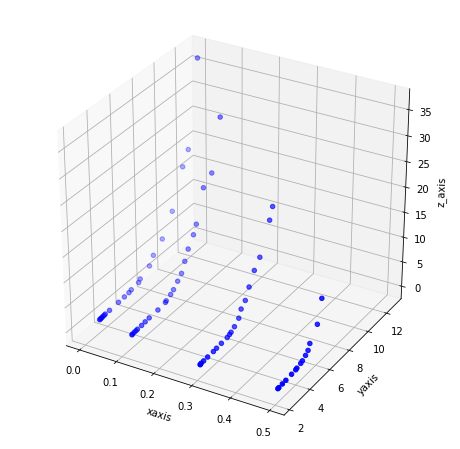

In [42]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')

X = data['R'].values
Y = data['delta_K'].values
Z = data['crack_growth_rate'].values
ax.scatter(X,Y,Z, c = 'b' , marker = 'o')
ax.set_xlabel('xaxis')
ax.set_ylabel('yaxis')
ax.set_zlabel('z_axis')
plt.show()

In [43]:
subdf_0 = data.loc[data['R'] == 0]
subdf_1 = data.loc[data['R'] == 0.1]
subdf_3 = data.loc[data['R'] == 0.3]
subdf_5 = data.loc[data['R'] == 0.5]

In [44]:
subdf_0

,R,delta_K,crack_growth_rate
0,0.0,3.31514,0.0504
1,0.0,3.36765,0.0893
2,0.0,3.44451,0.1010
3,0.0,3.52313,0.1190
4,0.0,3.61371,0.1730
5,0.0,3.73211,0.1960
6,0.0,3.82807,0.2480
7,0.0,4.21508,0.2900
8,0.0,5.04294,0.3940
9,0.0,5.58644,0.4970


In [46]:
## predict for R = 0
r0_data_predictions = loaded_model.predict(subdf_0.drop("crack_growth_rate",axis = 1))

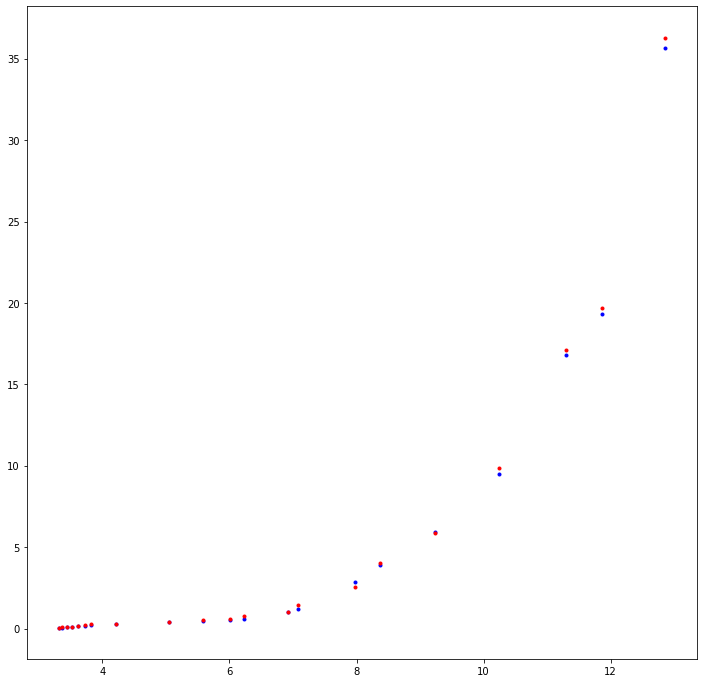

In [49]:
fig = plt.figure(figsize=(12,12))


ax0= fig.add_subplot(111)
ax0.scatter(subdf_0.delta_K, r0_data_predictions, c= 'b',marker ='.')
ax0.scatter(subdf_0.delta_K,subdf_0.crack_growth_rate, c= 'r' , marker ='.')
# ax0.scatter(subdf_1.delta_K,subdf_1.crack_growth_rate, c= 'b' , marker ='.')
# ax0.scatter(subdf_3.delta_K,subdf_3.crack_growth_rate, c= 'b' , marker ='o')
# ax0.scatter(subdf_5.delta_K,subdf_5.crack_growth_rate, c= 'r' , marker ='o')


In [ ]:
# one hell of a result/.///chill

In [73]:
np.tan(np.pi)

-1.2246467991473532e-16

In [87]:
temp_df = pd.DataFrame(data=None, columns=data.columns)
temp_df = temp_df.drop("crack_growth_rate", axis = 1)
new_row = {'R':0, 'delta_K':0.29}
temp_df = temp_df.append(new_row, ignore_index=True)
temp_df

,R,delta_K
0,0.0,0.29


In [ ]:
## fatigue life calculation(in cycles)
# check the units and dimensions before calculating
a = 0.5
if(R==0):
    delta_sigma = 80 #in MPa
else if(R == 0.1):
    delta_sigma = 77
else if(R == 0.3):
    delta_sigma = 53
else if(R == 0.5 ):
    delta_sigma = 46
width = 7.2 #in mm
while( a < 5 ):
    temp_df = pd.DataFrame(data=None, columns=data.columns)
    temp_df = temp_df.drop("crack_growth_rate",axis = 1)
    
    # formula from Niel_Anderson for mode-1 laoding
    Y = (width/a) * (1 /(np.pi)) * (np.tan ( (np.pi)/(width/a)))#calculating geometric factor
    
    temp_delta_k = Y * delta_sigma * np.sqrt( np.pi * a) #calculating delta k for this cycle
    
    new_row = {'R':R, 'delta_K':temp_delta_k}
    temp_df = temp_df.append(new_row, ignore_index=True)
    da = loaded_model.predict(temp_df)
    a += da
    
